# ***SISTEMA DE GESTIÓN DE VENTAS E INVENTARIO PARA PEQUEÑOS NEGOCIOS***
_ _ _

**Objetivo General:**

Desarrollar un sistema digital de gestión de ventas para tiendas de barrio y mini supermercados, que facilite el control de productos, el registro de transacciones y el análisis financiero, con el fin de mejorar la organización interna, apoyar la toma de decisiones y fomentar la formalización de estos negocios en contextos urbanos y rurales como la ciudad de Pasto.

**Objetivos Específicos:**

1. Diseñar una interfaz sencilla que permita registrar productos con información detallada como nombre, código, precio de compra, precio de venta y stock disponible.

2. Implementar una funcionalidad para registrar ventas en tiempo real, indicando productos, cantidades, totales y fecha/hora de la transacción.

3. Realizar un módulo de consulta de ventas, que permita visualizar el historial de transacciones y filtrar por rangos de fecha.

4. Generar reportes automáticos sobre ventas diarias, productos más vendidos y movimientos recientes, para facilitar el análisis del negocio.

5. Incorporar herramientas de análisis exploratorio de datos (EDA) que permitan al comerciante conocer sus ganancias, pérdidas y otros indicadores clave de desempeño.

**Link explicación:**
https://youtu.be/9Npkv2QF5xg?si=hfY4Mz-ox0ppIjpP


=== SISTEMA DE VENTAS - TIENDA DE BARRIO ===

Inventario cargado correctamente desde Inventario_Tienda_Barrio.xlsx

Historial de ventas cargado correctamente desde Ventas_Tienda_Barrio.xlsx

=== MENÚ PRINCIPAL ===
1. Gestión de Productos
2. Registro de Ventas
3. Consultas y Reportes
4. Análisis Exploratorio de Datos (EDA)
5. Salir

Seleccione una opción: 4

=== ANÁLISIS EXPLORATORIO DE DATOS (EDA) ===
__________________________________________________
 MENÚ DE ANÁLISIS DE DATOS
__________________________________________________
1.  Resumen estadístico completo
2.  Productos más vendidos
3.  Distribución de ventas por producto
4.  Ganancias por producto
5.  Serie de tiempo de ingresos
6.  Volver al menú principal

Seleccione una opción (1-8): 2

=== PRODUCTOS MÁS VENDIDOS ===


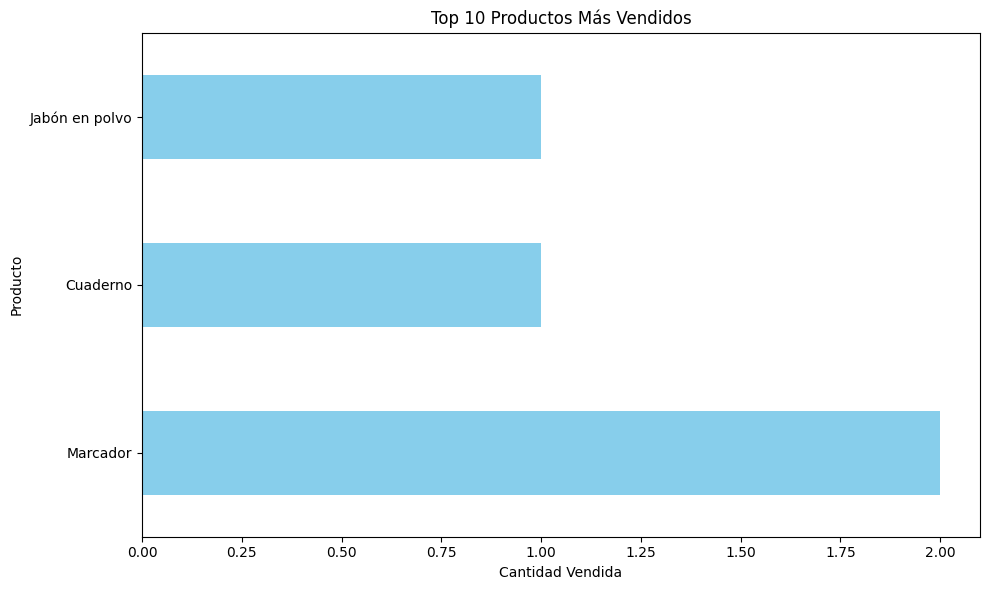


__________________________________________________
GRÁFICO: PRODUCTOS MÁS VENDIDOS
__________________________________________________
OPCIONES DISPONIBLES:
1.  Guardar gráfico como imagen
2.  Regenerar gráfico
3.  Volver al menú de análisis
4.  Mantener gráfico abierto
Seleccione una opción (1-4): 3
 Volviendo al menú de análisis...
__________________________________________________
 MENÚ DE ANÁLISIS DE DATOS
__________________________________________________
1.  Resumen estadístico completo
2.  Productos más vendidos
3.  Distribución de ventas por producto
4.  Ganancias por producto
5.  Serie de tiempo de ingresos
6.  Volver al menú principal

Seleccione una opción (1-8): 6
⬅️  Volviendo al menú principal...

=== MENÚ PRINCIPAL ===
1. Gestión de Productos
2. Registro de Ventas
3. Consultas y Reportes
4. Análisis Exploratorio de Datos (EDA)
5. Salir

Seleccione una opción: 5

Saliendo del sistema...


In [ ]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
from openpyxl import load_workbook

# Variables globales
inventario = pd.DataFrame()
ventas = pd.DataFrame()

def cargar_inventario():
    """Carga el inventario desde el archivo Excel o crea uno nuevo si no existe"""
    global inventario
    try:
        if os.path.exists('Inventario_Tienda_Barrio.xlsx'):
            inventario = pd.read_excel('Inventario_Tienda_Barrio.xlsx')
            print("\nInventario cargado correctamente desde Inventario_Tienda_Barrio.xlsx")
        else:
            # Crear un inventario vacío con la estructura correcta
            inventario = pd.DataFrame(columns=['Categoría', 'Nombre', 'Código',
                                             'Precio de Compra (COP)', 'Precio Unitario (COP)',
                                             'Cantidad en Stock'])
            guardar_inventario()
            print("\nSe creó un nuevo archivo de inventario.")
    except Exception as e:
        print(f"\nError al cargar el inventario: {e}")
        inventario = pd.DataFrame(columns=['Categoría', 'Nombre', 'Código',
                                         'Precio de Compra (COP)', 'Precio Unitario (COP)',
                                         'Cantidad en Stock'])

NOMBRE_ARCHIVO_VENTAS = 'Ventas_Tienda.xlsx'
def cargar_ventas():
    """Carga el historial de ventas"""
    global ventas
    try:
        if os.path.exists(NOMBRE_ARCHIVO_VENTAS):
            ventas = pd.read_excel(NOMBRE_ARCHIVO_VENTAS)
            # Asegurar que la columna de fecha sea datetime
            ventas['Fecha'] = pd.to_datetime(ventas['Fecha']).dt.date
            print("\nHistorial de ventas cargado correctamente desde Ventas_Tienda_Barrio.xlsx")
        else:
            # Crear un DataFrame vacío con la estructura solicitada
            ventas = pd.DataFrame(columns=['Fecha', 'Código', 'Nombre Producto',
                                         'Cantidad Vendida', 'Precio Unitario',
                                         'Subtotal', 'Total Venta'])
            guardar_ventas()
            print("\nSe creó un nuevo archivo de ventas.")
    except Exception as e:
        print(f"\nError al cargar ventas: {e}")
        ventas = pd.DataFrame(columns=['Fecha', 'Código', 'Nombre Producto',
                                     'Cantidad Vendida', 'Precio Unitario',
                                     'Subtotal', 'Total Venta'])
def guardar_inventario():
    """Guarda el inventario en el archivo Excel"""
    try:
        inventario.to_excel('Inventario_Tienda.xlsx', index=False)
    except Exception as e:
        print(f"\nError al guardar el inventario: {e}")

def guardar_ventas():
    """Guarda el historial de ventas en el archivo Excel de manera robusta"""
    try:
        # Si no hay ventas para guardar
        if ventas.empty:
            print("\nNo hay ventas nuevas para guardar.")
            return

        # Si el archivo no existe, crearlo nuevo
        if not os.path.exists(NOMBRE_ARCHIVO_VENTAS):
            ventas.to_excel(NOMBRE_ARCHIVO_VENTAS, index=False, sheet_name='Ventas')
            print(f"\nArchivo {NOMBRE_ARCHIVO_VENTAS} creado exitosamente.")
            return

        # Si el archivo existe, usar este enfoque seguro:
        try:
            # Leer datos existentes
            existing = pd.read_excel(NOMBRE_ARCHIVO_VENTAS)
            # Combinar con nuevos datos (solo filas nuevas)
            combined = pd.concat([existing, ventas]).drop_duplicates()
            # Guardar todo de nuevo
            combined.to_excel(NOMBRE_ARCHIVO_VENTAS, index=False)
            print(f"\nVentas añadidas a {NOMBRE_ARCHIVO_VENTAS}")

        except Exception as e:
            # Si hay error al leer, crear archivo nuevo
            print(f"\nAdvertencia: Error al leer {NOMBRE_ARCHIVO_VENTAS} - Creando uno nuevo. Error: {str(e)}")
            ventas.to_excel(NOMBRE_ARCHIVO_VENTAS, index=False)

    except Exception as e:
        print(f"\nError grave al guardar ventas: {str(e)}")
        print("Recomendación: Verifique los permisos del archivo o intente con otro nombre.")

def obtener_siguiente_codigo(categoria):
    """
    Obtiene el siguiente código disponible para una categoría específica
    Rangos de códigos por categoría:
    - Abarrotes: 1000-1999
    - Verduras: 2000-2999
    - Limpieza: 3000-3999
    - Papeleria: 4000-4999
    - Medicamentos: 5000-5999
    - Licor: 6000-6999
    - Mecato: 8000-8999
    """
    global inventario

    # Mapeo de categorías con sus rangos de códigos
    rangos_categoria = {
        'abarrotes': (1000, 1999),
        'verduras': (2000, 2999),
        'limpieza': (3000, 3999),
        'papeleria': (4000, 4999),
        'medicamentos': (5000, 5999),
        'licor': (6000, 6999),
        'mecato': (8000, 8999)
    }

    categoria_lower = categoria.lower()

    if categoria_lower not in rangos_categoria:
        print(f"\nAdvertencia: Categoría '{categoria}' no reconocida.")
        print("Categorías válidas:", ", ".join(rangos_categoria.keys()))
        return None

    rango_min, rango_max = rangos_categoria[categoria_lower]

    # Obtener códigos existentes de esta categoría
    if not inventario.empty:
        codigos_categoria = inventario[
            inventario['Categoría'].str.lower() == categoria_lower
        ]['Código'].tolist()
    else:
        codigos_categoria = []

    # Encontrar el siguiente código disponible
    for codigo in range(rango_min, rango_max + 1):
        if codigo not in codigos_categoria:
            return codigo

    # Si no hay códigos disponibles en el rango
    print(f"\nError: No hay códigos disponibles para la categoría '{categoria}'")
    print(f"Rango completo ({rango_min}-{rango_max}) está ocupado.")
    return None

def mostrar_categorias_disponibles():
    """Muestra las categorías disponibles con sus rangos de códigos"""
    print("\n=== CATEGORÍAS DISPONIBLES ===")
    categorias_info = [
        ("Abarrotes", "1000-1999"),
        ("Verduras", "2000-2999"),
        ("Limpieza", "3000-3999"),
        ("Papeleria", "4000-4999"),
        ("Medicamentos", "5000-5999"),
        ("Licor", "6000-6999"),
        ("Mecato", "8000-8999")
    ]

    for categoria, rango in categorias_info:
        print(f"{categoria:<15} (Códigos: {rango})")
def buscar_producto_por_codigo(codigo):
    """Busca un producto por su código"""
    global inventario

    if inventario.empty:
        return None

    producto = inventario[inventario['Código'] == codigo]

    if producto.empty:
        return None

    return producto.iloc[0]

def mostrar_info_codigos():
    """Muestra información sobre el sistema de códigos"""
    print("\n=== INFORMACIÓN DEL SISTEMA DE CÓDIGOS ===")
    print("Este sistema asigna códigos automáticamente según la categoría:")
    print()

    rangos = [
        ("Abarrotes", "1000-1999", "Productos de consumo básico"),
        ("Verduras", "2000-2999", "Frutas y verduras frescas"),
        ("Limpieza", "3000-3999", "Productos de aseo y limpieza"),
        ("Papeleria", "4000-4999", "Útiles escolares y oficina"),
        ("Medicamentos", "5000-5999", "Medicamentos y salud"),
        ("Licor", "6000-6999", "Bebidas alcohólicas"),
        ("Mecato", "8000-8999", "Snacks y golosinas")
    ]

    for categoria, rango, descripcion in rangos:
        print(f"{categoria:<15} {rango:<12} - {descripcion}")

    print("\n• Los códigos se asignan automáticamente de forma consecutiva")
    print("• Cada categoría tiene 1000 códigos disponibles")
    print("• El sistema evita duplicados automáticamente")

    input("\nPresione Enter para continuar...")

# Función auxiliar para mostrar estadísticas por categoría
def estadisticas_por_categoria():
    """Muestra estadísticas completas por categoría incluyendo ventas"""
    print("\n=== ESTADÍSTICAS COMPLETAS POR CATEGORÍA ===")

    if inventario.empty:
        print("\nNo hay productos en el inventario.")
        return

    # ESTADÍSTICAS DE INVENTARIO POR CATEGORÍA
    # =====================================================
    print("\n ESTADÍSTICAS DE INVENTARIO")
    print("_" * 80)

    # Agrupar por categoría y calcular estadísticas
    stats_inventario = inventario.groupby('Categoría').agg({
        'Código': 'count',
        'Cantidad en Stock': 'sum',
        'Precio Unitario (COP)': 'mean',
        'Precio de Compra (COP)': 'mean'
    }).round(2)

    stats_inventario.columns = ['Tipos', 'Stock Total', 'P.Venta Prom.', 'P.Compra Prom.']

    # Ordenar por el orden de códigos
    orden_categorias = {
        'Abarrotes': 1, 'Verduras': 2, 'Limpieza': 3, 'Papeleria': 4,
        'Medicamentos': 5, 'Licor': 6, 'Mecato': 8
    }

    stats_inventario['Orden'] = stats_inventario.index.map(lambda x: orden_categorias.get(x, 999))
    stats_inventario = stats_inventario.sort_values('Orden').drop('Orden', axis=1)

    # Calcular valor total del inventario por categoría
    valor_inventario = []
    for categoria in stats_inventario.index:
        productos_categoria = inventario[inventario['Categoría'] == categoria]
        valor_total = (productos_categoria['Cantidad en Stock'] * productos_categoria['Precio de Compra (COP)']).sum()
        valor_inventario.append(valor_total)

    stats_inventario['Valor Inventario'] = valor_inventario

    print(stats_inventario.to_string())
    print(f"\nTOTAL INVENTARIO: {stats_inventario['Tipos'].sum()} tipos, {stats_inventario['Stock Total'].sum()} unidades")
    print(f"VALOR TOTAL INVENTARIO: ${stats_inventario['Valor Inventario'].sum():,.2f} COP")

    # ESTADÍSTICAS DE VENTAS POR CATEGORÍA
    # =====================================================
    if not ventas.empty:
        print(f"\n ESTADÍSTICAS DE VENTAS")
        print("=_" * 80)

        # Agrupar ventas por categoría
        stats_ventas = ventas.groupby('Categoría').agg({
            'Cantidad vendida': ['sum', 'count'],
            'Subtotal': 'sum',
            'Utilidad': 'sum'
        }).round(2)

        # Aplanar columnas
        stats_ventas.columns = ['Unidades Vendidas', 'Transacciones', 'Ingresos Totales', 'Ganancias Totales']

        # Ordenar por el mismo orden que inventario
        stats_ventas['Orden'] = stats_ventas.index.map(lambda x: orden_categorias.get(x, 999))
        stats_ventas = stats_ventas.sort_values('Orden').drop('Orden', axis=1)

        # Calcular porcentajes
        total_unidades_vendidas = stats_ventas['Unidades Vendidas'].sum()
        total_ingresos = stats_ventas['Ingresos Totales'].sum()
        total_ganancias = stats_ventas['Ganancias Totales'].sum()

        stats_ventas['% Unidades'] = ((stats_ventas['Unidades Vendidas'] / total_unidades_vendidas) * 100).round(1)
        stats_ventas['% Ingresos'] = ((stats_ventas['Ingresos Totales'] / total_ingresos) * 100).round(1)

        print(stats_ventas.to_string())
        print(f"\nTOTAL VENTAS: {total_unidades_vendidas:,.0f} unidades, {stats_ventas['Transacciones'].sum():,.0f} transacciones")
        print(f"INGRESOS TOTALES: ${total_ingresos:,.2f} COP")
        print(f"GANANCIAS TOTALES: ${total_ganancias:,.2f} COP")

        # ANÁLISIS DESTACADO
        # =====================================================
        print(f"\n ANÁLISIS DESTACADO")
        print("_" * 80)

        # Categoría más vendida (por unidades)
        categoria_mas_vendida = stats_ventas['Unidades Vendidas'].idxmax()
        unidades_mas_vendida = stats_ventas.loc[categoria_mas_vendida, 'Unidades Vendidas']
        porcentaje_mas_vendida = stats_ventas.loc[categoria_mas_vendida, '% Unidades']

        print(f" CATEGORÍA MÁS VENDIDA: {categoria_mas_vendida}")
        print(f"   └─ {unidades_mas_vendida:,.0f} unidades ({porcentaje_mas_vendida}% del total)")

        # Categoría con más ingresos
        categoria_mas_ingresos = stats_ventas['Ingresos Totales'].idxmax()
        ingresos_mas_alta = stats_ventas.loc[categoria_mas_ingresos, 'Ingresos Totales']
        porcentaje_ingresos = stats_ventas.loc[categoria_mas_ingresos, '% Ingresos']

        print(f" CATEGORÍA CON MÁS INGRESOS: {categoria_mas_ingresos}")
        print(f"   └─ ${ingresos_mas_alta:,.2f} COP ({porcentaje_ingresos}% del total)")

        # Categoría más rentable
        categoria_mas_rentable = stats_ventas['Ganancias Totales'].idxmax()
        ganancias_mas_alta = stats_ventas.loc[categoria_mas_rentable, 'Ganancias Totales']

        print(f" CATEGORÍA MÁS RENTABLE: {categoria_mas_rentable}")
        print(f"   └─ ${ganancias_mas_alta:,.2f} COP en ganancias")

        # Categoría menos vendida
        categoria_menos_vendida = stats_ventas['Unidades Vendidas'].idxmin()
        unidades_menos_vendida = stats_ventas.loc[categoria_menos_vendida, 'Unidades Vendidas']

        print(f" CATEGORÍA MENOS VENDIDA: {categoria_menos_vendida}")
        print(f"   └─ {unidades_menos_vendida:,.0f} unidades")

        # Margen de rentabilidad promedio por categoría
        print(f"\n💡 MARGEN DE RENTABILIDAD POR CATEGORÍA:")
        for categoria in stats_ventas.index:
            if stats_ventas.loc[categoria, 'Ingresos Totales'] > 0:
                margen = (stats_ventas.loc[categoria, 'Ganancias Totales'] /
                         stats_ventas.loc[categoria, 'Ingresos Totales']) * 100
                print(f"   {categoria}: {margen:.1f}%")

        # Promedio de venta por transacción
        print(f"\n PROMEDIO POR TRANSACCIÓN:")
        for categoria in stats_ventas.index:
            if stats_ventas.loc[categoria, 'Transacciones'] > 0:
                promedio = (stats_ventas.loc[categoria, 'Ingresos Totales'] /
                           stats_ventas.loc[categoria, 'Transacciones'])
                print(f"   {categoria}: ${promedio:,.2f} COP")

        # Rotación de inventario (aproximada)
        print(f"\n ROTACIÓN DE INVENTARIO (unidades vendidas/stock actual):")
        for categoria in stats_inventario.index:
            if categoria in stats_ventas.index:
                stock_actual = stats_inventario.loc[categoria, 'Stock Total']
                if stock_actual > 0:
                    rotacion = stats_ventas.loc[categoria, 'Unidades Vendidas'] / stock_actual
                    print(f"   {categoria}: {rotacion:.2f}x")
                else:
                    print(f"   {categoria}: Sin stock")
            else:
                print(f"   {categoria}: Sin ventas registradas")

    else:
        print(f"\n ESTADÍSTICAS DE VENTAS")
        print("_" * 80)
        print("\nNo hay ventas registradas para mostrar estadísticas.")

        print(f"\n ANÁLISIS DESTACADO")
        print("_" * 80)
        print(" Sin datos de ventas, solo estadísticas de inventario disponibles.")

        # Mostrar algunas estadísticas básicas del inventario
        categoria_mas_stock = stats_inventario['Stock Total'].idxmax()
        stock_mas_alto = stats_inventario.loc[categoria_mas_stock, 'Stock Total']

        categoria_mas_cara = stats_inventario['P.Venta Prom.'].idxmax()
        precio_mas_alto = stats_inventario.loc[categoria_mas_cara, 'P.Venta Prom.']

        print(f" CATEGORÍA CON MÁS STOCK: {categoria_mas_stock} ({stock_mas_alto:,.0f} unidades)")
        print(f" CATEGORÍA CON PRECIO PROMEDIO MÁS ALTO: {categoria_mas_cara} (${precio_mas_alto:,.2f})")

    input("\nPresione Enter para continuar...")

def mostrar_menu_principal():
    """Muestra el menú principal y maneja las opciones"""
    while True:
        print("\n=== MENÚ PRINCIPAL ===")
        print("1. Gestión de Productos")
        print("2. Registro de Ventas")
        print("3. Consultas y Reportes")
        print("4. Análisis Exploratorio de Datos (EDA)")
        print("5. Salir")

        opcion = input("\nSeleccione una opción: ")

        if opcion == '1':
            gestion_productos()
        elif opcion == '2':
            registro_ventas()
        elif opcion == '3':
            consultas_reportes()
        elif opcion == '4':
            analisis_datos()
        elif opcion == '5':
            print("\nSaliendo del sistema...")
            break
        else:
            print("\nOpción no válida. Intente nuevamente.")

def gestion_productos():
    """Menú para la gestión de productos"""
    global inventario
    cambios_pendientes = False  # Bandera para controlar cambios no guardados

    while True:
        print("\n=== GESTIÓN DE PRODUCTOS ===")
        print("1. Agregar producto")
        print("2. Modificar producto")
        print("3. Eliminar producto")
        print("4. Listar productos por categoría")
        if cambios_pendientes:
            print("5. Guardar cambios en inventario")
            print("6. Volver al menú principal (sin guardar)")
        else:
            print("5. Volver al menú principal")

        opcion = input("\nSeleccione una opción: ")

        if opcion == '1':
            agregar_producto()
            cambios_pendientes = True
        elif opcion == '2':
            modificar_producto()
            cambios_pendientes = True
        elif opcion == '3':
            eliminar_producto()
            cambios_pendientes = True
        elif opcion == '4':
            listar_productos()
        elif opcion == '5':
            if cambios_pendientes:
                guardar_inventario()
                cambios_pendientes = False
                print("\nCambios guardados correctamente.")
            else:
                break
        elif opcion == '6' and cambios_pendientes:
            confirmar = input("\n¿Está seguro de salir sin guardar los cambios? (s/n): ").lower()
            if confirmar == 's':
                break
        else:
            print("\nOpción no válida. Intente nuevamente.")



def agregar_producto():
    """Agrega un nuevo producto al inventario con código automático"""
    global inventario
    print("\n=== AGREGAR PRODUCTO ===")

    # Mostrar categorías disponibles
    mostrar_categorias_disponibles()

    try:
        # Solicitar categoría
        categoria = input("\nIngrese la categoría del producto: ").strip()

        if not categoria:
            print("\nError: Debe ingresar una categoría.")
            return

        # Obtener el siguiente código automáticamente
        codigo = obtener_siguiente_codigo(categoria)

        if codigo is None:
            return  # Error ya mostrado en la función

        # Capitalizar la primera letra de la categoría para consistencia
        categoria = categoria.capitalize()

        print(f"\n✓ Código asignado automáticamente: {codigo}")

        # Solicitar resto de información
        nombre = input("Nombre del producto: ").strip()

        if not nombre:
            print("\nError: Debe ingresar un nombre para el producto.")
            return

        precio_compra = float(input("Precio de compra (COP): "))
        precio_venta = float(input("Precio unitario de venta (COP): "))
        stock = int(input("Cantidad en stock: "))

        # Validaciones básicas
        if precio_compra < 0 or precio_venta < 0:
            print("\nError: Los precios no pueden ser negativos.")
            return

        if stock < 0:
            print("\nError: El stock no puede ser negativo.")
            return

        if precio_venta <= precio_compra:
            confirmar = input(f"\n¿Advertencia: El precio de venta ({precio_venta}) es menor o igual al precio de compra ({precio_compra}). ¿Continuar? (s/n): ").lower()
            if confirmar != 's':
                print("Operación cancelada.")
                return

        # Crear nuevo producto
        nuevo_producto = {
            'Categoría': categoria,
            'Nombre': nombre,
            'Código': codigo,
            'Precio de Compra (COP)': precio_compra,
            'Precio Unitario (COP)': precio_venta,
            'Cantidad en Stock': stock
        }

        # Agregar al inventario
        inventario = pd.concat([inventario, pd.DataFrame([nuevo_producto])], ignore_index=True)

        # Mostrar resumen del producto agregado
        print(f"\n✅ PRODUCTO AGREGADO EXITOSAMENTE")
        print(f"   Categoría: {categoria}")
        print(f"   Nombre: {nombre}")
        print(f"   Código: {codigo}")
        print(f"   Precio de compra: ${precio_compra:,.2f} COP")
        print(f"   Precio de venta: ${precio_venta:,.2f} COP")
        print(f"   Stock: {stock} unidades")

        # Guardar automáticamente
        guardar_inventario()
        print("   ✓ Guardado en el archivo Excel")

    except ValueError as e:
        print(f"\nError: Ingrese valores numéricos válidos para precios y stock. ({e})")
    except KeyboardInterrupt:
        print("\nOperación cancelada por el usuario.")
    except Exception as e:
        print(f"\nError inesperado al agregar producto: {e}")

def modificar_producto():
    """Modifica los datos de un producto existente (en memoria)"""
    global inventario  # Esta línea debe ir al principio de la función
    print("\n=== MODIFICAR PRODUCTO ===")

    if inventario.empty:
        print("\nNo hay productos en el inventario.")
        return

    try:
        codigo = int(input("Ingrese el código del producto a modificar: "))

        if codigo not in inventario['Código'].values:
            print("\nError: No existe un producto con ese código.")
            return

        idx = inventario[inventario['Código'] == codigo].index[0]
        producto = inventario.loc[idx]

        print("\nDatos actuales del producto:")
        print(f"Categoría: {producto['Categoría']}")
        print(f"Nombre: {producto['Nombre']}")
        print(f"Código: {producto['Código']}")
        print(f"Precio de compra: {producto['Precio de Compra (COP)']}")
        print(f"Precio de venta: {producto['Precio Unitario (COP)']}")
        print(f"Stock: {producto['Cantidad en Stock']}")

        print("\nIngrese los nuevos datos (deje en blanco para mantener el valor actual):")

        categoria = input(f"Categoría [{producto['Categoría']}]: ") or producto['Categoría']
        nombre = input(f"Nombre [{producto['Nombre']}]: ") or producto['Nombre']

        precio_compra = input(f"Precio de compra [{producto['Precio de Compra (COP)']}]: ")
        precio_compra = float(precio_compra) if precio_compra else producto['Precio de Compra (COP)']

        precio_venta = input(f"Precio de venta [{producto['Precio Unitario (COP)']}]: ")
        precio_venta = float(precio_venta) if precio_venta else producto['Precio Unitario (COP)']

        stock = input(f"Stock [{producto['Cantidad en Stock']}]: ")
        stock = int(stock) if stock else producto['Cantidad en Stock']

        inventario.at[idx, 'Categoría'] = categoria
        inventario.at[idx, 'Nombre'] = nombre
        inventario.at[idx, 'Precio de Compra (COP)'] = precio_compra
        inventario.at[idx, 'Precio Unitario (COP)'] = precio_venta
        inventario.at[idx, 'Cantidad en Stock'] = stock

        print("\nProducto modificado correctamente.")
        guardar_inventario()

    except ValueError:
        print("\nError: Ingrese valores numéricos válidos para precios y stock.")
    except Exception as e:
        print(f"\nError al modificar producto: {e}")

def eliminar_producto():
    """Elimina un producto del inventario (en memoria)"""
    global inventario  # Declaración global al inicio

    print("\n=== ELIMINAR PRODUCTO ===")

    if inventario.empty:
        print("\nNo hay productos en el inventario.")
        return

    try:
        codigo = int(input("Ingrese el código del producto a eliminar: "))

        if codigo not in inventario['Código'].values:
            print("\nError: No existe un producto con ese código.")
            return

        producto = inventario[inventario['Código'] == codigo].iloc[0]
        print(f"\nProducto a eliminar: {producto['Nombre']} ({producto['Categoría']})")

        confirmacion = input("\n¿Está seguro que desea eliminar este producto? (s/n): ").lower()

        if confirmacion == 's':
            inventario = inventario[inventario['Código'] != codigo]
            print("\nProducto eliminado correctamente.")
        else:
            print("\nOperación cancelada.")

    except ValueError:
        print("\nError: Ingrese un código numérico válido.")
    except Exception as e:
        print(f"\nError al eliminar producto: {e}")

def listar_productos():
    """Lista todos los productos agrupados por categoría en orden de código"""
    print("\n=== LISTADO DE PRODUCTOS POR CATEGORÍA ===")

    if inventario.empty:
        print("\nNo hay productos en el inventario.")
        return

    # Definir el orden de las categorías por código
    orden_categorias = {
        'Abarrotes': 1,
        'Verduras': 2,
        'Limpieza': 3,
        'Papeleria': 4,
        'Medicamentos': 5,
        'Licor': 6,
        'Mecato': 8
    }

    # Agrupar por categoría
    categorias_disponibles = inventario.groupby('Categoría')

    # Ordenar categorías según el orden definido
    categorias_ordenadas = sorted(
        categorias_disponibles,
        key=lambda x: orden_categorias.get(x[0], 999)  # 999 para categorías no reconocidas
    )

    total_productos = 0
    valor_total_inventario = 0

    for categoria, grupo in categorias_ordenadas:
        print(f"\n{'='*60}")
        print(f"🏷️  {categoria.upper()}")
        print(f"{'_'*60}")

        # Ordenar productos dentro de la categoría por código
        grupo_ordenado = grupo.sort_values('Código')

        # Crear tabla formateada
        print(f"{'Código':<8} {'Nombre':<25} {'Stock':<8} {'P.Venta':<12} {'P.Compra':<12}")
        print("-" * 65)

        for _, producto in grupo_ordenado.iterrows():
            nombre_truncado = producto['Nombre'][:23] + '..' if len(producto['Nombre']) > 25 else producto['Nombre']
            print(f"{producto['Código']:<8} {nombre_truncado:<25} {producto['Cantidad en Stock']:<8} "
                  f"${producto['Precio Unitario (COP)']:>9.0f} ${producto['Precio de Compra (COP)']:>10.0f}")

            # Acumular totales
            total_productos += producto['Cantidad en Stock']
            valor_total_inventario += producto['Cantidad en Stock'] * producto['Precio de Compra (COP)']

        print(f"\nProductos en {categoria}: {len(grupo)} tipos, {grupo['Cantidad en Stock'].sum()} unidades")

    # Mostrar resumen general
    print(f"\n{'_'*60}")
    print(f" RESUMEN GENERAL DEL INVENTARIO")
    print(f"{'_'*60}")
    print(f"Total de tipos de productos: {len(inventario)}")
    print(f"Total de unidades en stock: {total_productos}")
    print(f"Valor total del inventario: ${valor_total_inventario:,.2f} COP")

    input("\nPresione Enter para continuar...")

def registro_ventas():
    """Maneja todo el proceso de registro de ventas"""
    global inventario

    if inventario.empty:
        print("\nNo hay productos en el inventario para vender.")
        return

    productos_vendidos = []
    continuar = True

    while continuar:
        try:
            # Listar productos disponibles
            print("\nProductos disponibles:")
            print(inventario[['Código', 'Nombre', 'Precio Unitario (COP)', 'Cantidad en Stock']].to_string(index=False))

            codigo = int(input("\nIngrese el código del producto a vender (0 para terminar): "))

            if codigo == 0:
                continuar = False
                continue

            if codigo not in inventario['Código'].values:
                print("\nError: No existe un producto con ese código.")
                continue

            producto = inventario[inventario['Código'] == codigo].iloc[0]
            print(f"\nProducto seleccionado: {producto['Nombre']}")
            print(f"Precio unitario: {producto['Precio Unitario (COP)']} COP")
            print(f"Stock disponible: {producto['Cantidad en Stock']}")

            cantidad = int(input("Ingrese la cantidad a vender: "))

            if cantidad <= 0:
                print("\nError: La cantidad debe ser mayor que cero.")
                continue

            if cantidad > producto['Cantidad en Stock']:
                print("\nError: No hay suficiente stock para esta venta.")
                continue

            subtotal = cantidad * producto['Precio Unitario (COP)']
            utilidad = cantidad * (producto['Precio Unitario (COP)'] - producto['Precio de Compra (COP)'])

            productos_vendidos.append({
                'codigo': codigo,
                'nombre': producto['Nombre'],
                'categoria': producto['Categoría'],
                'cantidad': cantidad,
                'precio_unitario': producto['Precio Unitario (COP)'],
                'precio_compra': producto['Precio de Compra (COP)'],
                'subtotal': subtotal,
                'utilidad': utilidad
            })

            print(f"\nProducto agregado a la venta. Subtotal: {subtotal} COP")

            otro = input("\n¿Desea agregar otro producto? (s/n): ").lower()
            if otro != 's':
                continuar = False

        except ValueError:
            print("\nError: Ingrese valores numéricos válidos.")
        except Exception as e:
            print(f"\nError al registrar venta: {e}")

    if productos_vendidos:
        mostrar_resumen_venta(productos_vendidos)
        confirmar = input("\n¿Confirmar la venta? (s/n): ").lower()
        if confirmar == 's':
            registrar_venta(productos_vendidos)
            print("\nVenta registrada correctamente.")
        else:
            print("\nVenta cancelada.")
    else:
        print("\nNo se registró ninguna venta.")

def mostrar_resumen_venta(productos):
    """Muestra un resumen de la venta en formato de factura"""
    fecha_hora = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    total = sum(p['subtotal'] for p in productos)
    total_utilidad = sum(p['utilidad'] for p in productos)

    print("\n=== FACTURA DE VENTA ===")
    print(f"Fecha: {fecha_hora}")
    print("\nDetalle:")
    print("-" * 60)
    print(f"{'Producto':<20} {'Cant.':>6} {'P.Unit.':>10} {'Subtotal':>10}")
    print("-" * 60)

    for p in productos:
        print(f"{p['nombre'][:18]:<20} {p['cantidad']:>6} {p['precio_unitario']:>10.2f} {p['subtotal']:>10.2f}")

    print("-" * 60)
    print(f"{'TOTAL:':<36} {total:>10.2f}")
    print(f"{'Utilidad estimada:':<36} {total_utilidad:>10.2f}")
    print("-" * 60)

def registrar_venta(productos):
    """Registra la venta en memoria y actualiza el stock"""
    global inventario, ventas
    fecha_hora = datetime.datetime.now()

    # Actualizar stock en inventario
    for p in productos:
        idx = inventario[inventario['Código'] == p['codigo']].index[0]
        inventario.at[idx, 'Cantidad en Stock'] -= p['cantidad']

    # Agregar venta al historial
    nuevas_ventas = []

    for p in productos:
        nueva_venta = {
            'Fecha y hora': fecha_hora,
            'Código del producto': p['codigo'],
            'Nombre del producto': p['nombre'],
            'Categoría': p['categoria'],
            'Cantidad vendida': p['cantidad'],
            'Precio unitario': p['precio_unitario'],
            'Precio de compra': p['precio_compra'],
            'Subtotal': p['subtotal'],
            'Utilidad': p['utilidad']
        }
        nuevas_ventas.append(nueva_venta)

    ventas = pd.concat([ventas, pd.DataFrame(nuevas_ventas)], ignore_index=True)
    guardar_ventas()


def consultas_reportes():
    """Menú para consultas y reportes"""
    while True:
        print("\n=== CONSULTAS Y REPORTES ===")
        print("1. Ver todas las ventas")
        print("2. Consultar ventas por fecha")
        print("3. Producto más vendido")
        print("4. Total de ingresos")
        print("5. Ganancia total")
        print("6. Productos con stock bajo")
        print("7. Estadísticas por categoría")
        print("8. Volver al menú principal")

        opcion = input("\nSeleccione una opción: ")

        if opcion == '1':
            ver_todas_ventas()
        elif opcion == '2':
            consultar_ventas_fecha()
        elif opcion == '3':
            producto_mas_vendido()
        elif opcion == '4':
            total_ingresos()
        elif opcion == '5':
            ganancia_total()
        elif opcion == '6':
            productos_stock_bajo()
        elif opcion == '7':
            estadisticas_por_categoria()
        elif opcion == '8':
            break
        else:
            print("\nOpción no válida. Intente nuevamente.")

def ver_todas_ventas():
    """Muestra todas las ventas registradas"""
    print("\n=== HISTORIAL DE VENTAS ===")

    if ventas.empty:
        print("\nNo hay ventas registradas.")
        return

    # Mostrar solo las columnas más relevantes
    print(ventas[['Fecha y hora', 'Nombre del producto', 'Cantidad vendida', 'Subtotal']].to_string(index=False))
    input("\nPresione Enter para continuar...")

def consultar_ventas_fecha():
    """Consulta ventas por fecha o rango de fechas"""
    print("\n=== CONSULTA DE VENTAS POR FECHA ===")

    if ventas.empty:
        print("\nNo hay ventas registradas.")
        return

    try:
        fecha_inicio = input("Ingrese fecha de inicio (YYYY-MM-DD) o dejar en blanco: ")
        fecha_fin = input("Ingrese fecha de fin (YYYY-MM-DD) o dejar en blanco: ")

        if not fecha_inicio and not fecha_fin:
            # Mostrar todas las ventas si no se especifican fechas
            print(ventas[['Fecha y hora', 'Nombre del producto', 'Cantidad vendida', 'Subtotal']].to_string(index=False))
        else:
            # Filtrar por fechas
            if fecha_inicio:
                fecha_inicio = pd.to_datetime(fecha_inicio)
                mask = ventas['Fecha y hora'] >= fecha_inicio
            else:
                mask = pd.Series(True, index=ventas.index)

            if fecha_fin:
                fecha_fin = pd.to_datetime(fecha_fin) + pd.Timedelta(days=1)  # Incluir todo el día
                mask = mask & (ventas['Fecha y hora'] <= fecha_fin)

            ventas_filtradas = ventas[mask]

            if ventas_filtradas.empty:
                print("\nNo hay ventas en el rango de fechas especificado.")
            else:
                print(ventas_filtradas[['Fecha y hora', 'Nombre del producto', 'Cantidad vendida', 'Subtotal']].to_string(index=False))

        input("\nPresione Enter para continuar...")
    except ValueError:
        print("\nError: Formato de fecha incorrecto. Use YYYY-MM-DD.")
    except Exception as e:
        print(f"\nError al consultar ventas: {e}")

def producto_mas_vendido():
    """Muestra el producto más vendido en cantidad"""
    print("\n=== PRODUCTO MÁS VENDIDO ===")

    if ventas.empty:
        print("\nNo hay ventas registradas.")
        return

    producto_mas_vendido = ventas.groupby('Nombre del producto')['Cantidad vendida'].sum().idxmax()
    cantidad = ventas.groupby('Nombre del producto')['Cantidad vendida'].sum().max()

    print(f"\nProducto más vendido: {producto_mas_vendido}")
    print(f"Cantidad total vendida: {cantidad}")

    input("\nPresione Enter para continuar...")

def total_ingresos():
    """Muestra el total de ingresos por ventas"""
    print("\n=== TOTAL DE INGRESOS ===")

    if ventas.empty:
        print("\nNo hay ventas registradas.")
        return

    total = ventas['Subtotal'].sum()
    print(f"\nTotal de ingresos: {total:.2f} COP")

    input("\nPresione Enter para continuar...")

def ganancia_total():
    """Muestra la ganancia total (utilidad)"""
    print("\n=== GANANCIA TOTAL ===")

    if ventas.empty:
        print("\nNo hay ventas registradas.")
        return

    total = ventas['Utilidad'].sum()
    print(f"\nGanancia total: {total:.2f} COP")

    input("\nPresione Enter para continuar...")

def productos_stock_bajo():
    """Muestra productos con stock bajo (menos de 10 unidades)"""
    print("\n=== PRODUCTOS CON STOCK BAJO (<10 unidades) ===")

    if inventario.empty:
        print("\nNo hay productos en el inventario.")
        return

    stock_bajo = inventario[inventario['Cantidad en Stock'] < 10]

    if stock_bajo.empty:
        print("\nNo hay productos con stock bajo.")
    else:
        print(stock_bajo[['Nombre', 'Categoría', 'Cantidad en Stock']].to_string(index=False))

    input("\nPresione Enter para continuar...")

def mostrar_grafico_con_menu(fig, nombre_default, descripcion_grafico=""):

    plt.show(block=False)  # Mostrar el gráfico sin bloquear

    # Pequeña pausa para asegurar que el gráfico se muestre
    time.sleep(0.5)

    while True:
        try:
            print("\n" + "_"*50)
            if descripcion_grafico:
                print(f"GRÁFICO: {descripcion_grafico}")
                print("_"*50)
            print("OPCIONES DISPONIBLES:")
            print("1.  Guardar gráfico como imagen")
            print("2.  Regenerar gráfico")
            print("3.  Volver al menú de análisis")
            print("4.  Mantener gráfico abierto")
            print("="*50)

            opcion = input("Seleccione una opción (1-4): ").strip()

            if opcion == '1':
                # Guardar gráfico
                nombre = input(f"Nombre del archivo (Enter para '{nombre_default}'): ").strip()
                nombre = nombre if nombre else nombre_default

                if not nombre.endswith(('.png', '.jpg', '.jpeg', '.pdf')):
                    nombre += '.png'

                try:
                    fig.savefig(nombre, bbox_inches='tight', dpi=300, facecolor='white')
                    print(f"✅ Gráfico guardado como '{nombre}'")
                    time.sleep(1)
                except Exception as e:
                    print(f"❌ Error al guardar: {e}")
                    time.sleep(1)

            elif opcion == '2':
                # Regenerar gráfico
                plt.close(fig)
                print(" Regenerando gráfico...")
                return False  # Indicar que se debe regenerar

            elif opcion == '3':
                # Volver al menú
                plt.close(fig)
                print(" Volviendo al menú de análisis...")
                return True

            elif opcion == '4':
                # Mantener abierto
                print(" Gráfico mantenido abierto. Puede minimizar esta ventana.")
                print("   Presione Enter cuando esté listo para continuar...")
                input()
                continue

            else:
                print("❌ Opción no válida. Por favor ingrese 1, 2, 3 o 4.")
                time.sleep(1)

        except KeyboardInterrupt:
            print("\n⚠️ Operación cancelada por el usuario.")
            plt.close(fig)
            return True
        except Exception as e:
            print(f"❌ Error inesperado: {e}")
            plt.close(fig)
            return True

def analisis_datos():
    """Menú principal de análisis exploratorio de datos mejorado"""
    print("\n=== ANÁLISIS EXPLORATORIO DE DATOS (EDA) ===")

    if ventas.empty:
        print("\n❌ No hay ventas registradas para analizar.")
        input("\nPresione Enter para volver al menú principal...")
        return

    while True:
        print("_"*50)
        print(" MENÚ DE ANÁLISIS DE DATOS")
        print("_"*50)
        print("1.  Resumen estadístico completo")
        print("2.  Productos más vendidos")
        print("3.  Distribución de ventas por producto")
        print("4.  Ganancias por producto")
        print("5.  Serie de tiempo de ingresos")
        print("6.  Volver al menú principal")
        print("="*50)

        try:
            opcion = input("\nSeleccione una opción (1-8): ").strip()

            if opcion == '1':
                resumen_estadistico()

            elif opcion == '2':
                while True:
                    fig = productos_mas_vendidos_grafico()
                    if fig is None:
                        break
                    if mostrar_grafico_con_menu(fig, "productos_mas_vendidos", "PRODUCTOS MÁS VENDIDOS"):
                        break

            elif opcion == '3':
                while True:
                    fig = distribucion_ventas()
                    if fig is None:
                        break
                    if mostrar_grafico_con_menu(fig, "distribucion_ventas", "DISTRIBUCIÓN DE VENTAS"):
                        break

            elif opcion == '4':
                while True:
                    fig = ganancias_por_producto()
                    if fig is None:
                        break
                    if mostrar_grafico_con_menu(fig, "ganancias_por_producto", "GANANCIAS POR PRODUCTO"):
                        break

            elif opcion == '5':
                while True:
                    fig = serie_tiempo_ingresos()
                    if fig is None:
                        break
                    if mostrar_grafico_con_menu(fig, "ingresos_por_dia", "SERIE DE TIEMPO - INGRESOS"):
                        break

            elif opcion == '6':
                print("⬅️  Volviendo al menú principal...")
                break

            else:
                print("\n❌ Opción no válida. Por favor ingrese un número del 1 al 8.")
                time.sleep(1)

        except KeyboardInterrupt:
            print("\n⚠️ Operación cancelada por el usuario.")
            break
        except Exception as e:
            print(f"\n❌ Error inesperado: {e}")
            time.sleep(2)


def resumen_estadistico():
    """Muestra un resumen estadístico de las ventas"""
    print("\n=== RESUMEN ESTADÍSTICO ===")

    # Totales básicos
    total_ventas = len(ventas)
    total_ingresos = ventas['Subtotal'].sum()
    total_ganancias = ventas['Utilidad'].sum()

    print(f"\nTotal de ventas realizadas: {total_ventas}")
    print(f"Total de ingresos generados: {total_ingresos:.2f} COP")
    print(f"Total de ganancias: {total_ganancias:.2f} COP")

    # Productos más y menos vendidos
    ventas_por_producto = ventas.groupby('Nombre del producto')['Cantidad vendida'].sum()
    producto_mas_vendido = ventas_por_producto.idxmax()
    cantidad_mas_vendido = ventas_por_producto.max()
    producto_menos_vendido = ventas_por_producto.idxmin()
    cantidad_menos_vendido = ventas_por_producto.min()

    print(f"\nProducto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")
    print(f"Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} unidades)")

    # Promedio de ventas por producto
    promedio_ventas = ventas_por_producto.mean()
    print(f"\nPromedio de ventas por producto: {promedio_ventas:.1f} unidades")

    input("\nPresione Enter para continuar...")


def productos_mas_vendidos_grafico():
    """Genera gráfico de productos más vendidos"""
    print("\n=== PRODUCTOS MÁS VENDIDOS ===")

    if ventas.empty:
        print("\nNo hay ventas registradas para analizar.")
        input("\nPresione Enter para volver al menú anterior...")
        return None

    # Preparar datos
    top_productos = ventas.groupby('Nombre del producto')['Cantidad vendida'].sum().nlargest(10)

    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 6))
    top_productos.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title('Top 10 Productos Más Vendidos')
    ax.set_xlabel('Cantidad Vendida')
    ax.set_ylabel('Producto')
    plt.tight_layout()

    return fig

def distribucion_ventas():
    """Muestra histograma de frecuencia por productos"""
    print("\n=== DISTRIBUCIÓN DE VENTAS POR PRODUCTO ===")

    if ventas.empty:
        print("\nNo hay ventas registradas para analizar.")
        input("\nPresione Enter para volver al menú anterior...")
        return

    # Agrupar por producto y sumar cantidades vendidas
    ventas_por_producto = ventas.groupby('Nombre del producto')['Cantidad vendida'].sum()

    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=ventas_por_producto,
                bins=15,
                kde=True,
                color='skyblue',
                element='step')

    ax.set_title('Distribución de Ventas por Producto')
    ax.set_xlabel('Cantidad Vendida')
    ax.set_ylabel('Frecuencia')
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar gráfico con menú
    mostrar_grafico_con_menu(fig, "distribucion_ventas")

def ganancias_por_producto():
    """Muestra gráfico de ganancias por producto"""
    print("\n=== GANANCIAS POR PRODUCTO ===")

    if ventas.empty:
        print("\nNo hay ventas registradas para analizar.")
        input("\nPresione Enter para volver al menú anterior...")
        return None

    # Agrupar por producto y sumar utilidades
    ganancias_por_producto = ventas.groupby('Nombre del producto')['Utilidad'].sum().sort_values(ascending=False)

    # Tomar los top 10 o menos si hay menos productos
    top_n = min(10, len(ganancias_por_producto))
    top_ganancias = ganancias_por_producto.head(top_n)

    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.barplot(x=top_ganancias.values,
                y=top_ganancias.index,
                hue=top_ganancias.index,
                palette='magma',
                legend=False,
                dodge=False)

    ax.set_title(f'Top {top_n} Productos por Ganancias')
    ax.set_xlabel('Ganancias (COP)')
    ax.set_ylabel('Producto')

    # Mostrar valores en las barras
    for i, v in enumerate(top_ganancias.values):
        ax.text(v + 0.5, i, f"${v:,.0f}", color='black', va='center')

    plt.tight_layout()

    return fig

def serie_tiempo_ingresos():
    """Muestra serie de tiempo de ingresos por día"""
    print("\n=== SERIE DE TIEMPO DE INGRESOS ===")

    if ventas.empty:
        print("\nNo hay ventas registradas para analizar.")
        input("\nPresione Enter para volver al menú anterior...")
        return None

    # Crear copia para no modificar el original
    ventas_temp = ventas.copy()
    ventas_temp['Fecha'] = ventas_temp['Fecha y hora'].dt.date

    # Agrupar por fecha y sumar subtotales
    ingresos_por_dia = ventas_temp.groupby('Fecha')['Subtotal'].sum()

    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=ingresos_por_dia.index, y=ingresos_por_dia.values, marker='o', color='green', ax=ax)
    ax.set_title('Ingresos por Día')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Ingresos (COP)')
    plt.xticks(rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()

    return fig

def main():
    """Función principal que inicia el programa"""
    print("\n=== SISTEMA DE VENTAS - TIENDA DE BARRIO ===")

    # Cargar datos iniciales
    cargar_inventario()
    cargar_ventas()
    # Mostrar menú principal (aquí iría tu función mostrar_menu_principal() existente)
    mostrar_menu_principal()

if __name__ == "__main__":
    main()

# ***INTERFAZ GRÁFICA***
_ _ _

In [ ]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from gradio.components import Dataframe, File, Textbox, Number, Dropdown, Radio, Checkbox
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import tempfile
import shutil

# Variables globales
inventario = pd.DataFrame()
ventas = pd.DataFrame()
productos_venta_actual = []
total_venta_actual = 0
cliente_actual = ""

# Configuración de colores
COLOR_PRIMARIO = "#6A0DAD"  # Morado
COLOR_SECUNDARIO = "#FFFFFF"  # Blanco
COLOR_FONDO = "#121212"  # Negro oscuro
COLOR_TEXTO = "#E0E0E0"  # Gris claro
COLOR_BOTONES = "#9C27B0"  # Morado más claro

# Diccionario de rangos de códigos por categoría
RANGOS_CATEGORIAS = {
    "Abarrotes": (1000, 1999),
    "Verduras": (2000, 2999),
    "Limpieza": (3000, 3999),
    "Papeleria": (4000, 4999),
    "Medicamentos": (5000, 5999),
    "Licor": (6000, 6999),
    "Mecato": (8000, 8999)
}

# Lista de categorías disponibles (se actualizará dinámicamente)
categorias_disponibles = list(RANGOS_CATEGORIAS.keys())


# ==================== FUNCIONES AUXILIARES ====================

def obtener_siguiente_codigo(categoria):
    """Obtiene el siguiente código disponible para una categoría - VERSIÓN CORREGIDA"""
    try:
        # Si el inventario está vacío, empezar desde el inicio del rango
        if inventario.empty:
            if categoria in RANGOS_CATEGORIAS:
                return RANGOS_CATEGORIAS[categoria][0]
            else:
                return obtener_rango_categoria_nueva(categoria)[0]

        # Obtener el rango de códigos para la categoría
        if categoria in RANGOS_CATEGORIAS:
            rango_inicio, rango_fin = RANGOS_CATEGORIAS[categoria]
        else:
            rango_inicio, rango_fin = obtener_rango_categoria_nueva(categoria)

        # Filtrar por categoría y obtener códigos en el rango
        codigos_categoria = inventario[
            (inventario['Categoría'] == categoria) &
            (inventario['Código'] >= rango_inicio) &
            (inventario['Código'] <= rango_fin)
        ]['Código']

        if codigos_categoria.empty:
            return rango_inicio

        # Asegurar que los códigos sean enteros y obtener el máximo
        codigos_categoria = pd.to_numeric(codigos_categoria, errors='coerce').dropna()

        if codigos_categoria.empty:
            return rango_inicio

        siguiente_codigo = int(codigos_categoria.max()) + 1

        # Verificar que no exceda el rango
        if siguiente_codigo > rango_fin:
            return f"Error: Se agotaron los códigos para la categoría {categoria} (rango: {rango_inicio}-{rango_fin})"

        return siguiente_codigo

    except Exception as e:
        print(f"Error en obtener_siguiente_codigo: {e}")
        if categoria in RANGOS_CATEGORIAS:
            return RANGOS_CATEGORIAS[categoria][0]
        else:
            return obtener_rango_categoria_nueva(categoria)[0]

def obtener_rango_categoria_nueva(categoria):
    """Obtiene el rango para una nueva categoría"""
    # Para categorías nuevas, usar rangos a partir del 9000
    categorias_nuevas = [cat for cat in categorias_disponibles if cat not in RANGOS_CATEGORIAS]
    if categoria in categorias_nuevas:
        indice = categorias_nuevas.index(categoria)
        inicio = 9000 + (indice * 1000)
        fin = inicio + 999
        return (inicio, fin)
    else:
        # Si es una categoría completamente nueva, agregarla
        categorias_disponibles.append(categoria)
        indice = len([cat for cat in categorias_disponibles if cat not in RANGOS_CATEGORIAS]) - 1
        inicio = 9000 + (indice * 1000)
        fin = inicio + 999
        return (inicio, fin)
def mostrar_codigo_siguiente(categoria):
    """Muestra el siguiente código disponible para una categoría"""
    try:
        siguiente_codigo = obtener_siguiente_codigo(categoria)
        if isinstance(siguiente_codigo, str) and "Error" in siguiente_codigo:
            return f"❌ {siguiente_codigo}"
        else:
            return f"**Próximo código:** {siguiente_codigo}"
    except Exception as e:
        return f"❌ Error al obtener código: {str(e)}"

def buscar_producto_por_codigo(codigo):
    """Busca un producto por su código"""
    if inventario.empty:
        return None

    producto = inventario[inventario['Código'] == codigo]
    if producto.empty:
        return None

    return producto.iloc[0].to_dict()

# ==================== FUNCIONES DEL BACKEND ====================

def cargar_inventario(archivo=None):
    """Carga el inventario desde el archivo Excel o crea uno nuevo si no existe"""
    global inventario
    try:
        archivo_path = None

        if archivo is not None:
            # Si se proporciona un archivo, usarlo
            archivo_path = archivo
            mensaje_origen = "archivo proporcionado"
        elif os.path.exists('Inventario_Tienda_Barrio.xlsx'):
            archivo_path = 'Inventario_Tienda_Barrio.xlsx'
            mensaje_origen = "Inventario_Tienda_Barrio.xlsx"
        elif os.path.exists('Inventario_Tienda.xlsx'):
            archivo_path = 'Inventario_Tienda.xlsx'
            mensaje_origen = "Inventario_Tienda.xlsx"

        if archivo_path:
            # Intentar cargar el archivo
            inventario = pd.read_excel(archivo_path, engine='openpyxl')

            # Verificar que tenga las columnas necesarias
            columnas_requeridas = ['Categoría', 'Nombre', 'Código', 'Precio de Compra (COP)',
                                 'Precio Unitario (COP)', 'Cantidad en Stock']

            columnas_faltantes = [col for col in columnas_requeridas if col not in inventario.columns]

            if columnas_faltantes:
                return f"❌ Error: Faltan las siguientes columnas en el archivo: {', '.join(columnas_faltantes)}"

            # Limpiar datos nulos
            inventario = inventario.fillna(0)

            # Convertir tipos de datos
            inventario['Código'] = inventario['Código'].astype(int)
            inventario['Precio de Compra (COP)'] = pd.to_numeric(inventario['Precio de Compra (COP)'], errors='coerce').fillna(0)
            inventario['Precio Unitario (COP)'] = pd.to_numeric(inventario['Precio Unitario (COP)'], errors='coerce').fillna(0)
            inventario['Cantidad en Stock'] = pd.to_numeric(inventario['Cantidad en Stock'], errors='coerce').fillna(0).astype(int)

            return f"✅ Inventario cargado correctamente desde {mensaje_origen}. {len(inventario)} productos encontrados."
        else:
            # Crear archivo nuevo
            inventario = pd.DataFrame(columns=['Categoría', 'Nombre', 'Código',
                                             'Precio de Compra (COP)', 'Precio Unitario (COP)',
                                             'Cantidad en Stock'])
            guardar_inventario()
            return "✅ Se creó un nuevo archivo de inventario vacío."

    except Exception as e:
        inventario = pd.DataFrame(columns=['Categoría', 'Nombre', 'Código',
                                         'Precio de Compra (COP)', 'Precio Unitario (COP)',
                                         'Cantidad en Stock'])
        return f"❌ Error al cargar el inventario: {str(e)}"

def cargar_ventas(archivo=None):
    """Carga el historial de ventas"""
    global ventas
    try:
        archivo_path = None

        if archivo is not None:
            archivo_path = archivo
            mensaje_origen = "archivo proporcionado"
        elif os.path.exists('Ventas_Tienda.xlsx'):
            archivo_path = 'Ventas_Tienda.xlsx'
            mensaje_origen = "Ventas_Tienda.xlsx"

        if archivo_path:
            # Intentar cargar el archivo
            ventas = pd.read_excel(archivo_path, engine='openpyxl')

            # Verificar columnas necesarias
            columnas_requeridas = ['Fecha', 'Código', 'Nombre Producto', 'Cantidad Vendida',
                                 'Precio Unitario', 'Subtotal']

            columnas_faltantes = [col for col in columnas_requeridas if col not in ventas.columns]

            if columnas_faltantes:
                return f"❌ Error: Faltan las siguientes columnas en el archivo: {', '.join(columnas_faltantes)}"

            # Limpiar y convertir fechas
            ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], errors='coerce').dt.date

            # Limpiar datos nulos
            ventas = ventas.fillna(0)

            # Convertir tipos de datos
            ventas['Código'] = pd.to_numeric(ventas['Código'], errors='coerce').fillna(0).astype(int)
            ventas['Cantidad Vendida'] = pd.to_numeric(ventas['Cantidad Vendida'], errors='coerce').fillna(0).astype(int)
            ventas['Precio Unitario'] = pd.to_numeric(ventas['Precio Unitario'], errors='coerce').fillna(0)
            ventas['Subtotal'] = pd.to_numeric(ventas['Subtotal'], errors='coerce').fillna(0)

            return f"✅ Historial de ventas cargado correctamente desde {mensaje_origen}. {len(ventas)} registros encontrados."
        else:
            # Crear archivo nuevo
            ventas = pd.DataFrame(columns=['Fecha', 'Código', 'Nombre Producto',
                                         'Cantidad Vendida', 'Precio Unitario',
                                         'Subtotal', 'Total Venta', 'Cliente'])
            guardar_ventas()
            return "✅ Se creó un nuevo archivo de ventas vacío."

    except Exception as e:
        ventas = pd.DataFrame(columns=['Fecha', 'Código', 'Nombre Producto',
                                     'Cantidad Vendida', 'Precio Unitario',
                                     'Subtotal', 'Total Venta', 'Cliente'])
        return f"❌ Error al cargar ventas: {str(e)}"


def guardar_inventario():
    """Guarda el inventario en el archivo Excel - MEJORADA"""
    try:
        if inventario.empty:
            print("Advertencia: Intentando guardar inventario vacío")
            return False

        # Crear una copia para evitar modificar el original
        inventario_guardar = inventario.copy()

        # Asegurar tipos de datos correctos
        inventario_guardar['Código'] = inventario_guardar['Código'].astype(int)
        inventario_guardar['Precio de Compra (COP)'] = pd.to_numeric(inventario_guardar['Precio de Compra (COP)'], errors='coerce').fillna(0)
        inventario_guardar['Precio Unitario (COP)'] = pd.to_numeric(inventario_guardar['Precio Unitario (COP)'], errors='coerce').fillna(0)
        inventario_guardar['Cantidad en Stock'] = pd.to_numeric(inventario_guardar['Cantidad en Stock'], errors='coerce').fillna(0).astype(int)

        # Guardar archivo
        inventario_guardar.to_excel('Inventario_Tienda.xlsx', index=False, engine='openpyxl')
        return True

    except Exception as e:
        print(f"Error al guardar el inventario: {e}")
        return False

def guardar_ventas():
    """Guarda el historial de ventas"""
    try:
        ventas.to_excel('Ventas_Tienda.xlsx', index=False)
        return True
    except Exception as e:
        print(f"\nError al guardar ventas: {e}")
        return False

def agregar_producto_interface(categoria, nombre, precio_compra, precio_venta, cantidad):
    """Interfaz para agregar producto - VERSIÓN CORREGIDA"""
    global inventario, categorias_disponibles

    try:
        # Validaciones de entrada
        if not categoria or not nombre:
            return "❌ Error: Debe completar todos los campos obligatorios.", ""

        if precio_compra is None or precio_venta is None or cantidad is None:
            return "❌ Error: Debe ingresar valores numéricos para precios y cantidad.", ""

        precio_compra = float(precio_compra)
        precio_venta = float(precio_venta)
        cantidad = int(cantidad)

        if precio_compra < 0 or precio_venta < 0 or cantidad < 0:
            return "❌ Error: Los valores no pueden ser negativos.", ""

        if precio_venta <= precio_compra:
            mensaje_advertencia = "⚠️ Advertencia: El precio de venta es menor o igual al precio de compra. "
        else:
            mensaje_advertencia = ""

        # Agregar nueva categoría si no existe
        if categoria not in categorias_disponibles:
            categorias_disponibles.append(categoria)

        # Generar el código automáticamente
        codigo = obtener_siguiente_codigo(categoria)
        if isinstance(codigo, str) and "Error" in codigo:
            return f"❌ {codigo}", ""

        # Verificar que el código no exista ya (seguridad adicional)
        while not inventario.empty and codigo in inventario['Código'].values:
            codigo += 1

        nuevo_producto = {
            'Categoría': categoria,
            'Nombre': nombre.strip(),
            'Código': codigo,
            'Precio de Compra (COP)': precio_compra,
            'Precio Unitario (COP)': precio_venta,
            'Cantidad en Stock': cantidad
        }

        # Agregar al inventario
        inventario = pd.concat([inventario, pd.DataFrame([nuevo_producto])], ignore_index=True)

        # Guardar archivo
        if guardar_inventario():
            # Actualizar el siguiente código
            siguiente_codigo_info = mostrar_codigo_siguiente(categoria)
            return f"{mensaje_advertencia}✅ Producto '{nombre}' agregado exitosamente con código {codigo}.", siguiente_codigo_info
        else:
            return f"{mensaje_advertencia}⚠️ Producto agregado pero no se pudo guardar el archivo.", ""

    except ValueError as e:
        return f"❌ Error: Valores numéricos inválidos. {str(e)}", ""
    except Exception as e:
        return f"❌ Error inesperado: {str(e)}", ""

def actualizar_categorias_dropdown():
    """Actualiza la lista de categorías disponibles para los dropdowns"""
    # Obtener categorías únicas del inventario actual
    if not inventario.empty:
        categorias_inventario = inventario['Categoría'].unique().tolist()
        # Combinar con las categorías predefinidas
        todas_categorias = list(set(list(RANGOS_CATEGORIAS.keys()) + categorias_inventario))
        return sorted(todas_categorias)
    else:
        return list(RANGOS_CATEGORIAS.keys())

def modificar_producto_interface(codigo, campo, nuevo_valor):
    """Interfaz para modificar producto - CORREGIDA"""
    global inventario

    try:
        # Validaciones de entrada
        if codigo is None or codigo == 0:
            return "❌ Error: Debe ingresar un código de producto válido."

        if not campo or not nuevo_valor:
            return "❌ Error: Debe seleccionar un campo y proporcionar un nuevo valor."

        codigo = int(codigo)

        # Verificar que el producto existe
        producto_idx = inventario[inventario['Código'] == codigo].index

        if len(producto_idx) == 0:
            return f"❌ Error: No existe un producto con el código {codigo}."

        # Validar y convertir el nuevo valor según el campo
        if campo in ['Precio de Compra (COP)', 'Precio Unitario (COP)']:
            try:
                nuevo_valor = float(nuevo_valor)
                if nuevo_valor < 0:
                    return "❌ Error: Los precios no pueden ser negativos."
            except ValueError:
                return "❌ Error: Debe ingresar un valor numérico válido para el precio."

        elif campo == 'Cantidad en Stock':
            try:
                nuevo_valor = int(float(nuevo_valor))  # Permitir decimales que se convertirán a enteros
                if nuevo_valor < 0:
                    return "❌ Error: El stock no puede ser negativo."
            except ValueError:
                return "❌ Error: Debe ingresar un número entero válido para el stock."

        elif campo == 'Nombre':
            nuevo_valor = str(nuevo_valor).strip()
            if not nuevo_valor:
                return "❌ Error: El nombre del producto no puede estar vacío."

        # Obtener el producto actual para validaciones adicionales
        producto_actual = inventario.iloc[producto_idx[0]]

        # Validación especial para precios
        if campo == 'Precio de Compra (COP)':
            precio_venta = producto_actual['Precio Unitario (COP)']
            if nuevo_valor >= precio_venta:
                return f"⚠️ Advertencia: El precio de compra ({nuevo_valor}) es mayor o igual al precio de venta ({precio_venta})."

        elif campo == 'Precio Unitario (COP)':
            precio_compra = producto_actual['Precio de Compra (COP)']
            if nuevo_valor <= precio_compra:
                return f"⚠️ Advertencia: El precio de venta ({nuevo_valor}) es menor o igual al precio de compra ({precio_compra})."

        # Realizar la modificación
        inventario.at[producto_idx[0], campo] = nuevo_valor

        # Guardar archivo
        if guardar_inventario():
            return f"✅ Producto código {codigo} modificado correctamente. {campo}: {nuevo_valor}"
        else:
            return "❌ Error: Producto modificado pero no se pudo guardar el archivo."

    except ValueError as e:
        return f"❌ Error: Código de producto inválido. {str(e)}"
    except KeyError:
        return f"❌ Error: Campo '{campo}' no válido."
    except Exception as e:
        return f"❌ Error inesperado: {str(e)}"

def eliminar_producto_interface(codigo):
    """Interfaz para eliminar producto - CORREGIDA"""
    global inventario

    try:
        # Validaciones de entrada
        if codigo is None or codigo == 0:
            return "❌ Error: Debe ingresar un código de producto válido."

        codigo = int(codigo)

        # Verificar que el producto existe
        if codigo not in inventario['Código'].values:
            return f"❌ Error: No existe un producto con el código {codigo}."

        # Obtener información del producto antes de eliminarlo
        producto = inventario[inventario['Código'] == codigo].iloc[0]
        nombre_producto = producto['Nombre']

        # Verificar si el producto tiene ventas registradas (opcional)
        if not ventas.empty and codigo in ventas['Código'].values:
            return f"⚠️ Advertencia: El producto '{nombre_producto}' tiene ventas registradas. ¿Está seguro de eliminarlo? (Esta acción no se puede deshacer)"

        # Eliminar el producto
        inventario = inventario[inventario['Código'] != codigo].reset_index(drop=True)

        # Guardar archivo
        if guardar_inventario():
            return f"✅ Producto '{nombre_producto}' (código {codigo}) eliminado correctamente."
        else:
            return f"❌ Error: Producto eliminado de la memoria pero no se pudo guardar el archivo."

    except ValueError:
        return "❌ Error: El código debe ser un número entero válido."
    except Exception as e:
        return f"❌ Error inesperado: {str(e)}"

def listar_productos_por_categoria(categoria):
    """Lista productos filtrados por categoría"""
    if inventario.empty:
        return None, "No hay productos en el inventario."

    if categoria == "Todas":
        return inventario, f"Mostrando todos los productos ({len(inventario)})"
    else:
        productos_filtrados = inventario[inventario['Categoría'] == categoria]
        if productos_filtrados.empty:
            return None, f"No hay productos en la categoría {categoria}."
        return productos_filtrados, f"Mostrando productos de {categoria} ({len(productos_filtrados)})"

def actualizar_info_producto(codigo):
    """Actualiza la información del producto basada en el código ingresado"""
    if not codigo or codigo == 0:
        return "", "", 0  # Devuelve valores vacíos/cero para limpiar los campos

    try:
        codigo = int(codigo)
        producto = buscar_producto_por_codigo(codigo)

        if producto is None:
            return "❌ Producto no encontrado", "", 0

        return producto['Nombre'], producto['Categoría'], producto['Cantidad en Stock']
    except Exception as e:
        print(f"Error al actualizar info producto: {str(e)}")
        return "❌ Código inválido", "", 0

def agregar_producto_a_venta(codigo, cantidad, cliente):
    """Agrega un producto a la venta actual"""
    global productos_venta_actual, total_venta_actual, cliente_actual

    try:
        if not codigo or codigo == 0:
            return False, "❌ Debe ingresar un código de producto válido.", None, None

        codigo = int(codigo)
        cantidad = int(cantidad)

        if cantidad <= 0:
            return False, "❌ La cantidad debe ser mayor que cero.", None, None

        producto = buscar_producto_por_codigo(codigo)
        if producto is None:
            return False, f"❌ No existe un producto con el código {codigo}.", None, None

        if cantidad > producto['Cantidad en Stock']:
            return False, f"❌ No hay suficiente stock. Stock actual: {producto['Cantidad en Stock']}", None, None

        subtotal = cantidad * producto['Precio Unitario (COP)']
        productos_venta_actual.append({
            'codigo': codigo,
            'nombre': producto['Nombre'],
            'categoria': producto['Categoría'],
            'cantidad': cantidad,
            'precio_unitario': producto['Precio Unitario (COP)'],
            'subtotal': subtotal
        })

        total_venta_actual += subtotal
        cliente_actual = cliente if cliente else "Consumidor Final"

        # Crear tabla resumen
        df_venta = pd.DataFrame([{
            'Producto': item['nombre'],
            'Cantidad': item['cantidad'],
            'P. Unitario': f"${item['precio_unitario']:,.2f}",
            'Subtotal': f"${item['subtotal']:,.2f}"
        } for item in productos_venta_actual])

        resumen = f"💰 **Total acumulado:** ${total_venta_actual:,.2f} COP"

        return f"✅ Producto '{producto['Nombre']}' agregado a la venta.", df_venta, resumen

    except ValueError:
        return "❌ Error: Ingrese valores numéricos válidos.", None, None
    except Exception as e:
        return f"❌ Error inesperado: {str(e)}", None, None

def finalizar_venta():
    """Finaliza la venta actual y la registra"""
    global productos_venta_actual, total_venta_actual, ventas, cliente_actual

    if not productos_venta_actual:
        return "No hay productos en la venta actual.", None

    try:
        fecha_actual = datetime.datetime.now().date()
        nueva_venta = []

        for producto in productos_venta_actual:
            nueva_venta.append({
                'Fecha': fecha_actual,
                'Código': producto['codigo'],
                'Nombre Producto': producto['nombre'],
                'Categoría': producto['categoria'],
                'Cantidad Vendida': producto['cantidad'],
                'Precio Unitario': producto['precio_unitario'],
                'Subtotal': producto['subtotal'],
                'Total Venta': total_venta_actual,
                'Cliente': cliente_actual
            })

            # Actualizar stock
            idx = inventario[inventario['Código'] == producto['codigo']].index[0]
            inventario.at[idx, 'Cantidad en Stock'] -= producto['cantidad']

        ventas = pd.concat([ventas, pd.DataFrame(nueva_venta)], ignore_index=True)
        guardar_ventas()
        guardar_inventario()

        # Generar factura
        factura = generar_factura(fecha_actual, productos_venta_actual, total_venta_actual, cliente_actual)

        # Resetear venta actual
        productos_venta_actual = []
        total_venta_actual = 0
        cliente_actual = ""

        return "✅ Venta registrada correctamente.", factura

    except Exception as e:
        return f"❌ Error al registrar la venta: {str(e)}", None

def cancelar_venta():
    """Cancela la venta actual"""
    global productos_venta_actual, total_venta_actual, cliente_actual
    productos_venta_actual = []
    total_venta_actual = 0
    cliente_actual = ""
    return "✅ Venta cancelada correctamente.", None, None

def generar_factura(fecha, productos, total, cliente):
    """Genera una factura en formato HTML"""
    factura_html = f"""
    <div style='font-family: Arial, sans-serif; max-width: 600px; margin: 0 auto; border: 1px solid #ddd; padding: 20px; background-color: #f9f9f9; color: #333;'>
        <h2 style='color: {COLOR_PRIMARIO}; text-align: center;'>FACTURA ELECTRÓNICA</h2>
        <div style='display: flex; justify-content: space-between; margin-bottom: 20px;'>
            <div>
                <p><strong>Fecha:</strong> {fecha}</p>
                <p><strong>Cliente:</strong> {cliente if cliente else 'Consumidor Final'}</p>
            </div>
            <div>
                <p><strong>N° Factura:</strong> {len(ventas) + 1}</p>
            </div>
        </div>

        <table style='width: 100%; border-collapse: collapse; margin-bottom: 20px;'>
            <thead>
                <tr style='background-color: {COLOR_PRIMARIO}; color: white;'>
                    <th style='padding: 10px; text-align: left;'>Producto</th>
                    <th style='padding: 10px; text-align: center;'>Cantidad</th>
                    <th style='padding: 10px; text-align: right;'>P. Unitario</th>
                    <th style='padding: 10px; text-align: right;'>Subtotal</th>
                </tr>
            </thead>
            <tbody>
    """

    for producto in productos:
        factura_html += f"""
                <tr style='border-bottom: 1px solid #ddd;'>
                    <td style='padding: 8px;'>{producto['nombre']}</td>
                    <td style='padding: 8px; text-align: center;'>{producto['cantidad']}</td>
                    <td style='padding: 8px; text-align: right;'>${producto['precio_unitario']:,.2f}</td>
                    <td style='padding: 8px; text-align: right;'>${producto['subtotal']:,.2f}</td>
                </tr>
        """

    factura_html += f"""
            </tbody>
            <tfoot>
                <tr style='font-weight: bold;'>
                    <td colspan='3' style='padding: 10px; text-align: right;'>TOTAL:</td>
                    <td style='padding: 10px; text-align: right;'>${total:,.2f}</td>
                </tr>
            </tfoot>
        </table>

        <div style='text-align: center; margin-top: 20px; font-style: italic;'>
            <p>¡Gracias por su compra!</p>
            <p>Sistema de Gestión de Ventas - Tienda de Barrio</p>
        </div>
    </div>
    """

    return factura_html

def consultar_ventas_por_fecha(fecha_inicio, fecha_fin):
    """Consulta ventas por rango de fechas"""
    if ventas.empty:
        return None, "No hay ventas registradas."

    try:
        if fecha_inicio and fecha_fin:
            mask = (ventas['Fecha'] >= pd.to_datetime(fecha_inicio).date()) & \
                   (ventas['Fecha'] <= pd.to_datetime(fecha_fin).date())
            ventas_filtradas = ventas[mask]

            if ventas_filtradas.empty:
                return None, f"No hay ventas entre {fecha_inicio} y {fecha_fin}."
            return ventas_filtradas, f"Ventas entre {fecha_inicio} y {fecha_fin} ({len(ventas_filtradas)})"
        elif fecha_inicio:
            mask = ventas['Fecha'] >= pd.to_datetime(fecha_inicio).date()
            ventas_filtradas = ventas[mask]

            if ventas_filtradas.empty:
                return None, f"No hay ventas desde {fecha_inicio}."
            return ventas_filtradas, f"Ventas desde {fecha_inicio} ({len(ventas_filtradas)})"
        elif fecha_fin:
            mask = ventas['Fecha'] <= pd.to_datetime(fecha_fin).date()
            ventas_filtradas = ventas[mask]

            if ventas_filtradas.empty:
                return None, f"No hay ventas hasta {fecha_fin}."
            return ventas_filtradas, f"Ventas hasta {fecha_fin} ({len(ventas_filtradas)})"
        else:
            return ventas, f"Todas las ventas ({len(ventas)})"

    except Exception as e:
        return None, f"Error al filtrar ventas: {str(e)}"

def obtener_producto_mas_vendido():
    """Obtiene el producto más vendido"""
    if ventas.empty:
        return "", 0, "No hay ventas registradas."

    try:
        producto_mas_vendido = ventas.groupby('Nombre Producto')['Cantidad Vendida'].sum().idxmax()
        cantidad = ventas.groupby('Nombre Producto')['Cantidad Vendida'].sum().max()

        return producto_mas_vendido, cantidad, f"Producto más vendido: {producto_mas_vendido} ({cantidad} unidades)"
    except:
        return "", 0, "Error al calcular el producto más vendido."

def calcular_totales():
    """Calcula ingresos y ganancias totales"""
    if ventas.empty:
        return 0, 0, "No hay ventas registradas."

    try:
        ingresos = ventas['Subtotal'].sum()

        # Verificar si existe la columna de precio de compra en ventas
        if 'Precio de Compra (COP)' in ventas.columns:
            ganancias = (ventas['Precio Unitario'] - ventas['Precio de Compra (COP)']) * ventas['Cantidad Vendida']
            ganancias = ganancias.sum()
        else:
            # Si no existe, calcular basándose en el inventario actual
            ganancias = 0
            for _, venta in ventas.iterrows():
                producto = buscar_producto_por_codigo(venta['Código'])
                if producto:
                    ganancia_unitaria = venta['Precio Unitario'] - producto['Precio de Compra (COP)']
                    ganancias += ganancia_unitaria * venta['Cantidad Vendida']

        return ingresos, ganancias, f"Ingresos totales: ${ingresos:,.2f} COP | Ganancias totales: ${ganancias:,.2f} COP"
    except Exception as e:
        return 0, 0, f"Error al calcular totales: {str(e)}"

def limpiar_venta_actual():
    """Limpia los campos de la venta actual"""
    return 0, "", "", 0, 1  # codigo_producto, nombre_producto, categoria_producto, stock_disponible, cantidad

def obtener_productos_stock_bajo(umbral=10):
    """Obtiene productos con stock bajo"""
    if inventario.empty:
        return None, "No hay productos en el inventario."

    stock_bajo = inventario[inventario['Cantidad en Stock'] < umbral]

    if stock_bajo.empty:
        return None, f"No hay productos con stock menor a {umbral} unidades."
    return stock_bajo, f"Productos con stock bajo (<{umbral} unidades): {len(stock_bajo)}"

def generar_reporte_categoria(categoria, formato):
    """Genera reporte por categoría en el formato especificado"""
    try:
        if categoria == "Todas":
            datos = inventario
            titulo = "Reporte de todas las categorías"
        else:
            datos = inventario[inventario['Categoría'] == categoria]
            titulo = f"Reporte de categoría {categoria}"

        if datos.empty:
            return None, f"No hay datos para la categoría {categoria}."

        # Crear archivo temporal
        temp_dir = tempfile.mkdtemp()
        nombre_archivo = f"reporte_{categoria.lower().replace(' ', '_')}_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

        if formato == "Excel":
            ruta = os.path.join(temp_dir, f"{nombre_archivo}.xlsx")
            datos.to_excel(ruta, index=False)
        elif formato == "CSV":
            ruta = os.path.join(temp_dir, f"{nombre_archivo}.csv")
            datos.to_csv(ruta, index=False)
        else:  # PDF
            ruta = os.path.join(temp_dir, f"{nombre_archivo}.pdf")
            # Aquí iría la generación del PDF (requiere librerías adicionales)
            # Por simplicidad, usaremos HTML como ejemplo
            html = datos.to_html()
            with open(ruta, 'w') as f:
                f.write(html)

        return ruta, f"Reporte generado: {os.path.basename(ruta)}"

    except Exception as e:
        return None, f"Error al generar reporte: {str(e)}"
    finally:
        # Limpiar archivos temporales (en un entorno real se manejaría diferente)
        pass

def generar_grafico_productos_mas_vendidos():
    """Genera gráfico de productos más vendidos"""
    if ventas.empty:
        return None, "No hay ventas registradas para generar el gráfico."

    top_productos = ventas.groupby('Nombre Producto')['Cantidad Vendida'].sum().nlargest(10)

    fig = px.bar(top_productos,
                 x=top_productos.values,
                 y=top_productos.index,
                 orientation='h',
                 title='Top 10 Productos Más Vendidos',
                 labels={'x': 'Cantidad Vendida', 'y': 'Producto'},
                 color=top_productos.values,
                 color_continuous_scale='purples')

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    font_color=COLOR_TEXTO)

    return fig, "Gráfico generado correctamente."

def generar_grafico_distribucion_ventas():
    """Genera gráfico de distribución de ventas"""
    if ventas.empty:
        return None, "No hay ventas registradas para generar el gráfico."

    ventas_por_producto = ventas.groupby('Nombre Producto')['Cantidad Vendida'].sum()

    fig = px.histogram(ventas_por_producto,
                      nbins=15,
                      title='Distribución de Ventas por Producto',
                      labels={'value': 'Cantidad Vendida', 'count': 'Frecuencia'})

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    font_color=COLOR_TEXTO)

    return fig, "Gráfico generado correctamente."

def generar_grafico_ganancias_por_producto():
    """Genera gráfico de ganancias por producto"""
    if ventas.empty:
        return None, "No hay ventas registradas para generar el gráfico."

    ganancias_por_producto = ventas.groupby('Nombre Producto')['Subtotal'].sum().nlargest(10)

    fig = px.bar(ganancias_por_producto,
                x=ganancias_por_producto.index,
                y=ganancias_por_producto.values,
                title='Top 10 Productos por Ganancias',
                labels={'x': 'Producto', 'y': 'Ganancias (COP)'},
                color=ganancias_por_producto.values,
                color_continuous_scale='purples')

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    font_color=COLOR_TEXTO,
                    xaxis_tickangle=-45)

    return fig, "Gráfico generado correctamente."

def generar_grafico_serie_tiempo():
    """Genera gráfico de serie de tiempo de ingresos"""
    if ventas.empty:
        return None, "No hay ventas registradas para generar el gráfico."

    ventas_temp = ventas.copy()
    ventas_temp['Fecha'] = pd.to_datetime(ventas_temp['Fecha'])
    ingresos_por_dia = ventas_temp.groupby('Fecha')['Subtotal'].sum().reset_index()

    fig = px.line(ingresos_por_dia,
                 x='Fecha',
                 y='Subtotal',
                 title='Serie de Tiempo - Ingresos por Día',
                 labels={'Subtotal': 'Ingresos (COP)', 'Fecha': 'Fecha'},
                 markers=True)

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    font_color=COLOR_TEXTO)

    fig.update_traces(line_color=COLOR_PRIMARIO, marker_color=COLOR_PRIMARIO)

    return fig, "Gráfico generado correctamente."

def generar_resumen_estadistico():
    """Genera un resumen estadístico de las ventas"""
    if ventas.empty:
        return "<div style='color:red;'>No hay ventas registradas para generar el resumen.</div>", "No hay datos"

    try:
        resumen = {}
        ventas_temp = ventas.copy()

        # Asegurar que tenemos precios de compra
        if 'Precio de Compra (COP)' not in ventas_temp.columns:
            # Si no existe, calcular basándose en el inventario actual
            ventas_temp['Precio de Compra (COP)'] = ventas_temp['Código'].apply(
                lambda x: inventario.loc[inventario['Código'] == x, 'Precio de Compra (COP)'].values[0]
                if x in inventario['Código'].values else 0
            )

        # Totales básicos
        resumen['total_ventas'] = len(ventas_temp)
        resumen['total_ingresos'] = ventas_temp['Subtotal'].sum()
        resumen['total_ganancias'] = (ventas_temp['Precio Unitario'] - ventas_temp['Precio de Compra (COP)']) * ventas_temp['Cantidad Vendida']
        resumen['total_ganancias'] = resumen['total_ganancias'].sum()

        # Productos más y menos vendidos
        ventas_por_producto = ventas_temp.groupby('Nombre Producto')['Cantidad Vendida'].sum()
        resumen['producto_mas_vendido'] = ventas_por_producto.idxmax()
        resumen['cantidad_mas_vendido'] = ventas_por_producto.max()
        resumen['producto_menos_vendido'] = ventas_por_producto.idxmin()
        resumen['cantidad_menos_vendido'] = ventas_por_producto.min()

        # Promedios
        resumen['promedio_ventas'] = ventas_por_producto.mean()
        resumen['promedio_ingreso_por_venta'] = resumen['total_ingresos'] / resumen['total_ventas'] if resumen['total_ventas'] > 0 else 0

        # Formatear el resumen como HTML
        html_resumen = f"""
        <div style='font-family: Arial; padding: 20px; background: #f5f5f5; border-radius: 10px;'>
            <h2 style='color: {COLOR_PRIMARIO};'>Resumen Estadístico</h2>

            <div style='margin-bottom: 20px;'>
                <h3 style='color: {COLOR_PRIMARIO};'>Totales Generales</h3>
                <p><strong>Total de ventas registradas:</strong> {resumen['total_ventas']:,}</p>
                <p><strong>Ingresos totales:</strong> ${resumen['total_ingresos']:,.2f} COP</p>
                <p><strong>Ganancias totales:</strong> ${resumen['total_ganancias']:,.2f} COP</p>
            </div>

            <div style='margin-bottom: 20px;'>
                <h3 style='color: {COLOR_PRIMARIO};'>Productos Destacados</h3>
                <p><strong>Producto más vendido:</strong> {resumen['producto_mas_vendido']} ({resumen['cantidad_mas_vendido']:,} unidades)</p>
                <p><strong>Producto menos vendido:</strong> {resumen['producto_menos_vendido']} ({resumen['cantidad_menos_vendido']:,} unidades)</p>
                <p><strong>Promedio de ventas por producto:</strong> {resumen['promedio_ventas']:,.1f} unidades</p>
            </div>

            <div>
                <h3 style='color: {COLOR_PRIMARIO};'>Transacciones</h3>
                <p><strong>Promedio de ingreso por venta:</strong> ${resumen['promedio_ingreso_por_venta']:,.2f} COP</p>
            </div>
        </div>
        """
        return html_resumen, "Resumen generado correctamente."

    except Exception as e:
        return None, f"Error al generar resumen: {str(e)}"


# ==================== INTERFAZ GRÁFICA ====================

def crear_interfaz():
    """Crea la interfaz gráfica con Gradio"""

    # Tema personalizado
    theme = gr.themes.Soft(
        primary_hue="purple",
        secondary_hue="purple",
        neutral_hue="slate",
        font=[gr.themes.GoogleFont("Roboto"), "Arial", "sans-serif"]
    )

    with gr.Blocks(theme=theme, title="Sistema de Gestión de Ventas") as app:
        gr.Markdown(
            """
            # 🏪 Sistema de Gestión de Ventas e Inventario
            ### Gestión completa de productos, ventas y análisis de datos
            """
        )

        # Sección de carga inicial de datos
        with gr.Row():
            with gr.Column():
                gr.Markdown("### 📂 Cargar Datos Iniciales")
                with gr.Row():
                    btn_cargar_inventario = gr.Button("📦 Cargar Inventario", variant="primary")
                    file_inventario = gr.File(label="Archivo de inventario (.xlsx)", file_types=[".xlsx"])
                with gr.Row():
                    btn_cargar_ventas = gr.Button("💰 Cargar Ventas", variant="primary")
                    file_ventas = gr.File(label="Archivo de ventas (.xlsx)", file_types=[".xlsx"])
                status_carga = gr.Markdown("🔄 **Estado:** Esperando carga de datos...")

        # Pestañas principales
        with gr.Tabs():
            # Pestaña de Gestión de Productos
            with gr.Tab("📦 Gestión de Productos"):
                with gr.Row():
                    with gr.Column(scale=2):
                        gr.Markdown("### 🆕 Agregar Producto")
                        with gr.Row():
                            categoria = gr.Dropdown(
                                label="Categoría",
                                choices=["Abarrotes", "Verduras", "Limpieza", "Papeleria", "Medicamentos", "Licor", "Mecato"],
                                value="Abarrotes"
                            )
                            info_codigo = gr.Markdown("Próximo código: 1")  # AGREGAR ESTA LÍNEA
                            nombre = gr.Textbox(label="Nombre del Producto")

                        with gr.Row():
                            precio_compra = gr.Number(label="Precio de Compra (COP)", precision=2)
                            precio_venta = gr.Number(label="Precio de Venta (COP)", precision=2)
                            stock = gr.Number(label="Cantidad en Stock", precision=0)
                        btn_agregar = gr.Button("Agregar Producto", variant="primary")
                        output_agregar = gr.Markdown()

                        gr.Markdown("### ✏️ Modificar Producto")
                        with gr.Row():
                            codigo_modificar = gr.Number(label="Código del Producto", precision=0)
                            campo_modificar = gr.Dropdown(
                                label="Campo a Modificar",
                                choices=["Nombre", "Precio de Compra (COP)", "Precio Unitario (COP)", "Cantidad en Stock"],
                                value="Nombre"
                            )
                            valor_modificar = gr.Textbox(label="Nuevo Valor")
                        btn_modificar = gr.Button("Modificar Producto", variant="primary")
                        output_modificar = gr.Markdown()

                        gr.Markdown("### ❌ Eliminar Producto")
                        codigo_eliminar = gr.Number(label="Código del Producto a Eliminar", precision=0)
                        btn_eliminar = gr.Button("Eliminar Producto", variant="primary")
                        output_eliminar = gr.Markdown()

                    with gr.Column(scale=3):
                        gr.Markdown("### 📋 Listado de Productos")
                        categoria_filtrar = gr.Dropdown(
                            label="Filtrar por Categoría",
                            choices=["Todas", "Abarrotes", "Verduras", "Limpieza", "Papeleria", "Medicamentos", "Licor", "Mecato"],
                            value="Todas"
                        )
                        btn_filtrar = gr.Button("Filtrar", variant="primary")
                        tabla_productos = gr.Dataframe(
                            headers=["Categoría", "Nombre", "Código", "P. Compra", "P. Venta", "Stock"],
                            datatype=["str", "str", "number", "number", "number", "number"],
                            interactive=False
                        )
                        mensaje_productos = gr.Markdown()

                        # Dashboard de stock bajo
                        gr.Markdown("### ⚠️ Productos con Stock Bajo")
                        umbral_stock = gr.Slider(minimum=1, maximum=50, step=1, value=10, label="Umbral de Stock Bajo")
                        btn_ver_stock_bajo = gr.Button("Ver Productos", variant="primary")
                        tabla_stock_bajo = gr.Dataframe(
                            headers=["Categoría", "Nombre", "Código", "Stock"],
                            datatype=["str", "str", "number", "number"],
                            interactive=False
                        )
                        mensaje_stock_bajo = gr.Markdown()

            # Pestaña de Registro de Ventas
            with gr.Tab("💰 Registro de Ventas"):
              with gr.Row():
                  with gr.Column(scale=1):
                      gr.Markdown("### 🛒 Nueva Venta")
                      cliente = gr.Textbox(label="Nombre del Cliente (opcional)")
                      codigo_producto = gr.Number(label="Código del Producto", precision=0)  # ESTA LÍNEA FALTABA
                      with gr.Row():
                          nombre_producto = gr.Textbox(label="Nombre del Producto", interactive=False)
                          categoria_producto = gr.Textbox(label="Categoría", interactive=False)
                      stock_disponible = gr.Number(label="Stock Disponible", interactive=False)
                      cantidad = gr.Number(label="Cantidad", precision=0, value=1)

                      btn_agregar_venta = gr.Button("➕ Agregar a Venta", variant="primary")
                      output_agregar_venta = gr.Markdown()

                      with gr.Row():
                          btn_continuar_venta = gr.Button("🔄 Continuar Compra", variant="secondary")
                          btn_finalizar_venta = gr.Button("✅ Finalizar Venta", variant="primary")
                          btn_cancelar_venta = gr.Button("❌ Cancelar Venta", variant="stop")
                      output_venta = gr.Markdown()

                      tabla_venta_actual = gr.Dataframe(
                          headers=["Producto", "Cantidad", "P. Unitario", "Subtotal"],
                          datatype=["str", "number", "number", "number"],
                          interactive=False
                      )
                      resumen_venta = gr.Markdown()

                      with gr.Column(scale=1):
                        gr.Markdown("### 🧾 Vista Previa Factura")
                        factura_previa = gr.HTML()
                        btn_descargar_factura = gr.Button("📥 Descargar Factura", variant="primary")

            # Pestaña de Consultas y Reportes
            with gr.Tab("📊 Consultas y Reportes"):
                with gr.Row():
                    with gr.Column(scale=1):
                        gr.Markdown("### 🔍 Consultar Ventas")
                        with gr.Row():
                            fecha_inicio = gr.Textbox(label="Fecha Inicio (YYYY-MM-DD)", placeholder="Dejar vacío para no filtrar")
                            fecha_fin = gr.Textbox(label="Fecha Fin (YYYY-MM-DD)", placeholder="Dejar vacío para no filtrar")
                        btn_consultar_ventas = gr.Button("Consultar Ventas", variant="primary")
                        tabla_ventas = gr.Dataframe(
                            headers=["Fecha", "Producto", "Cantidad", "P. Unitario", "Subtotal"],
                            datatype=["str", "str", "number", "number", "number"],
                            interactive=False
                        )
                        mensaje_ventas = gr.Markdown()

                        gr.Markdown("### 📈 Métricas Clave")
                        btn_metricas = gr.Button("Calcular Métricas", variant="primary")
                        with gr.Row():
                            producto_mas_vendido = gr.Textbox(label="Producto Más Vendido", interactive=False)
                            cantidad_mas_vendido = gr.Number(label="Cantidad Vendida", interactive=False)
                        with gr.Row():
                            ingresos_totales = gr.Number(label="Ingresos Totales (COP)", interactive=False)
                            ganancias_totales = gr.Number(label="Ganancias Totales (COP)", interactive=False)

                    with gr.Column(scale=1):
                        gr.Markdown("### 📄 Generar Reportes")
                        categoria_reporte = gr.Dropdown(
                            label="Categoría para Reporte",
                            choices=["Todas", "Abarrotes", "Verduras", "Limpieza", "Papeleria", "Medicamentos", "Licor", "Mecato"],
                            value="Todas"
                        )
                        formato_reporte = gr.Radio(
                            label="Formato del Reporte",
                            choices=["Excel", "CSV", "PDF"],
                            value="Excel"
                        )
                        btn_generar_reporte = gr.Button("Generar Reporte", variant="primary")
                        output_reporte = gr.Markdown()
                        descargar_reporte = gr.File(interactive=False, visible=False)

            # Pestaña de Análisis Exploratorio (EDA)
            with gr.Tab("📈 Análisis Exploratorio (EDA)"):
                with gr.Row():
                    with gr.Column(scale=1):
                        gr.Markdown("### 📝 Resumen Estadístico")
                        btn_generar_resumen = gr.Button("Generar Resumen", variant="primary")
                        resumen_estadistico = gr.HTML()

                        gr.Markdown("### 📊 Gráficos de Análisis")
                        tipo_grafico = gr.Dropdown(
                            label="Seleccionar Gráfico",
                            choices=[
                                "Productos Más Vendidos",
                                "Distribución de Ventas",
                                "Ganancias por Producto",
                                "Serie de Tiempo de Ingresos"
                            ],
                            value="Productos Más Vendidos"
                        )
                        btn_generar_grafico = gr.Button("Generar Gráfico", variant="primary")
                        output_grafico = gr.Markdown()

                    with gr.Column(scale=2):
                        grafico = gr.Plot()
                        btn_descargar_grafico = gr.Button("📥 Descargar Gráfico", variant="primary")

        # Botón de salida
        with gr.Row():
            btn_salir = gr.Button("🚪 Salir del Sistema", variant="stop")
            mensaje_salida = gr.Markdown()

        # ==================== EVENTOS ====================
        def evento_agregar_producto(categoria, nombre, precio_compra, precio_venta, stock):
            """Evento corregido para agregar producto con actualización de código"""
            resultado, codigo_info = agregar_producto_interface(categoria, nombre, precio_compra, precio_venta, stock)
            # También actualizar las opciones de categorías
            nuevas_categorias = actualizar_categorias_dropdown() + ["Todas"]
            return resultado, codigo_info, gr.Dropdown.update(choices=nuevas_categorias)

        def evento_cambio_categoria(categoria):
            """Evento corregido para mostrar el siguiente código cuando cambia la categoría"""
            return mostrar_codigo_siguiente(categoria)

        def evento_agregar_nueva_categoria(nueva_categoria, categoria_actual):
            """Permite agregar una nueva categoría"""
            if nueva_categoria and nueva_categoria.strip():
                nueva_categoria = nueva_categoria.strip()
                if nueva_categoria not in categorias_disponibles:
                    categorias_disponibles.append(nueva_categoria)
                    categorias_actualizadas = actualizar_categorias_dropdown()
                    return (
                        gr.Dropdown.update(choices=categorias_actualizadas, value=nueva_categoria),
                        f"✅ Categoría '{nueva_categoria}' agregada correctamente.",
                        mostrar_codigo_siguiente(nueva_categoria),
                        ""  # Limpiar el campo de nueva categoría
                    )
                else:
                    return (
                        gr.Dropdown.update(value=nueva_categoria),
                        f"⚠️ La categoría '{nueva_categoria}' ya existe.",
                        mostrar_codigo_siguiente(nueva_categoria),
                        ""
                    )
            else:
                return (
                    gr.Dropdown.update(),
                    "❌ Debe ingresar un nombre para la nueva categoría.",
                    "",
                    nueva_categoria
                )


        # Carga inicial de datos
        btn_cargar_inventario.click(
            lambda: cargar_inventario(),
            outputs=[status_carga]
        )

        file_inventario.upload(
            lambda archivo: cargar_inventario(archivo),
            inputs=file_inventario,
            outputs=[status_carga]
        )

        btn_cargar_ventas.click(
            lambda: cargar_ventas(),
            outputs=[status_carga]
        )

        file_ventas.upload(
            lambda archivo: cargar_ventas(archivo),
            inputs=file_ventas,
            outputs=[status_carga]
        )

        # Gestión de Productos
        btn_agregar.click(
            evento_agregar_producto,
            inputs=[categoria, nombre, precio_compra, precio_venta, stock],
            outputs=[output_agregar, info_codigo]
        )

        categoria.change(
            evento_cambio_categoria,
            inputs=[categoria],
            outputs=[info_codigo]
        )

        btn_modificar.click(
            modificar_producto_interface,
            inputs=[codigo_modificar, campo_modificar, valor_modificar],
            outputs=[output_modificar]
        )

        btn_eliminar.click(
            eliminar_producto_interface,
            inputs=[codigo_eliminar],
            outputs=[output_eliminar]
        )

        btn_filtrar.click(
            listar_productos_por_categoria,
            inputs=[categoria_filtrar],
            outputs=[tabla_productos, mensaje_productos]
        )

        btn_ver_stock_bajo.click(
            obtener_productos_stock_bajo,
            inputs=[umbral_stock],
            outputs=[tabla_stock_bajo, mensaje_stock_bajo]
        )

        # Actualizar información cuando se cambia el código
        codigo_producto.change(
            actualizar_info_producto,
            inputs=[codigo_producto],
            outputs=[nombre_producto, categoria_producto, stock_disponible]
        )

        # Registro de Ventas
        btn_agregar_venta.click(
        agregar_producto_a_venta,
        inputs=[codigo_producto, cantidad, cliente],
        outputs=[output_agregar_venta, tabla_venta_actual, resumen_venta]
        )

        btn_continuar_venta.click(
            limpiar_venta_actual,
            outputs=[codigo_producto, nombre_producto, categoria_producto, stock_disponible, cantidad]
        )

        btn_finalizar_venta.click(
            finalizar_venta,
            outputs=[output_venta, factura_previa]
        )

        btn_cancelar_venta.click(
            cancelar_venta,
            outputs=[output_venta, tabla_venta_actual, resumen_venta]
        )

        # Consultas y Reportes
        btn_consultar_ventas.click(
            consultar_ventas_por_fecha,
            inputs=[fecha_inicio, fecha_fin],
            outputs=[tabla_ventas, mensaje_ventas]
        )

        btn_metricas.click(
            lambda: (
                obtener_producto_mas_vendido()[0],  # producto_mas_vendido
                obtener_producto_mas_vendido()[1],  # cantidad_mas_vendido
                calcular_totales()[0],              # ingresos_totales
                calcular_totales()[1]               # ganancias_totales
            ),
            outputs=[producto_mas_vendido, cantidad_mas_vendido, ingresos_totales, ganancias_totales]
        )


        btn_generar_reporte.click(
            generar_reporte_categoria,
            inputs=[categoria_reporte, formato_reporte],
            outputs=[output_reporte, descargar_reporte]
        )

        # Análisis Exploratorio
        btn_generar_resumen.click(
            generar_resumen_estadistico,
            outputs=[resumen_estadistico]
        )

        btn_generar_grafico.click(
            lambda tipo: {
                "Productos Más Vendidos": generar_grafico_productos_mas_vendidos,
                "Distribución de Ventas": generar_grafico_distribucion_ventas,
                "Ganancias por Producto": generar_grafico_ganancias_por_producto,
                "Serie de Tiempo de Ingresos": generar_grafico_serie_tiempo
            }[tipo](),
            inputs=[tipo_grafico],
            outputs=[grafico, output_grafico]
        )

        # Salir del sistema
        btn_salir.click(
            lambda: "Gracias por usar el sistema. ¡Nos vemos mañana! 👋",
            outputs=[mensaje_salida]
        )

    return app

# Iniciar la aplicación
if __name__ == "__main__":
    # Cargar datos iniciales
    cargar_inventario()
    cargar_ventas()

    # Crear y lanzar la interfaz
    interfaz = crear_interfaz()
    interfaz.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9068db069bfa5757d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
